In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



In [2]:
price_df = pd.read_csv(r"C:\Users\ranu1\Downloads\price_data (1).csv")

In [3]:

client_df=pd.read_csv(r"C:\Users\ranu1\Downloads\client_data (1).csv")

In [4]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
#checking null values
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [7]:
#checking null values
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [8]:
#Descriptive Statistics
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


In [11]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [12]:
# DATA CLEANING
client_df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [13]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [14]:
client_df['channel_sales'].eq('MISSING').sum()

3725

In [15]:
client_df['origin_up'].eq('MISSING').sum()


64

In [16]:
client_df.duplicated().sum()

0

In [17]:
price_df.duplicated().sum()

0

In [18]:
client_df['channel_sales'] = client_df['channel_sales'].replace('MISSING', np.nan)
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [19]:
client_df['origin_up'] = client_df['origin_up'].replace('MISSING', np.nan)
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [20]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', nan,
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [21]:
#### Define
#Convert `date_activ`, `date_end`, `date_modif_prod` and 
#`date_renewal` in **client_df** to `datetime`.

#Convert `price_date` in **price_df** to `datetime`.
#### Code
def convert_to_datetime(df, columns):
    """
    This function converts the type of columns in a dataframe to datetime
    parameters:
    df: The dataframe.
    columns: a list of strings that are the columns to convert.
    """
    for col in columns:
        df[col] = pd.to_datetime(df[col])

In [22]:
# Calling that function to client_df and price_df
convert_to_datetime(client_df, ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'])
convert_to_datetime(price_df, ['price_date'])

In [23]:
#checking the types of changed columns
client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']].dtypes

date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object

In [24]:
##### Define
#Replace `t` with `True` and `f` with `False` in `has_gas` column.
#### Code
client_df['has_gas'] = np.where(client_df['has_gas']=='t', True, False)

In [25]:
client_df['has_gas'].dtypes

dtype('bool')

In [26]:
# converting the type from bool to int
client_df['has_gas'] = client_df['has_gas'].astype(int)

In [27]:
client_df['has_gas'].dtypes

dtype('int32')

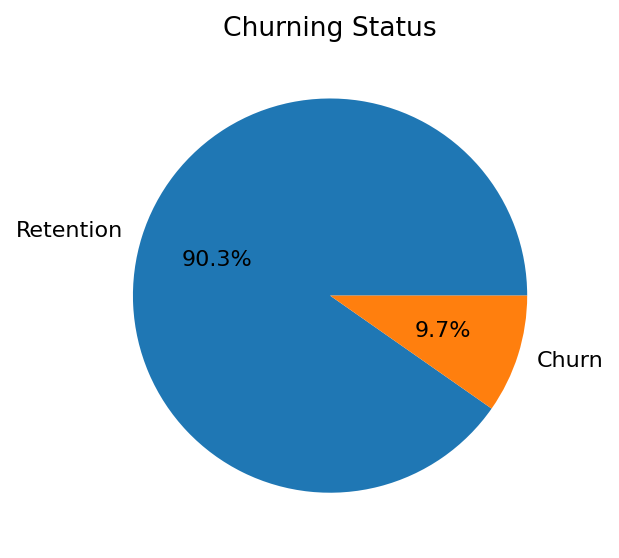

In [28]:
#DATA  VISUALIZATION
churned = client_df['churn'].value_counts()
plt.figure(figsize=(4,4), dpi=160)
plt.pie(churned.values, labels=['Retention','Churn'], autopct='%1.1f%%')
plt.title('Churning Status', fontsize=12)
plt.show()

In [29]:
#INSIGHTS
#THE DISTRIBUTION SHOWS THAT 9.7% OF CUSTOMERS HAVE CHURNED WHILE 90.3% 
#ARE CLIENTS STILL FOR POWERCO.

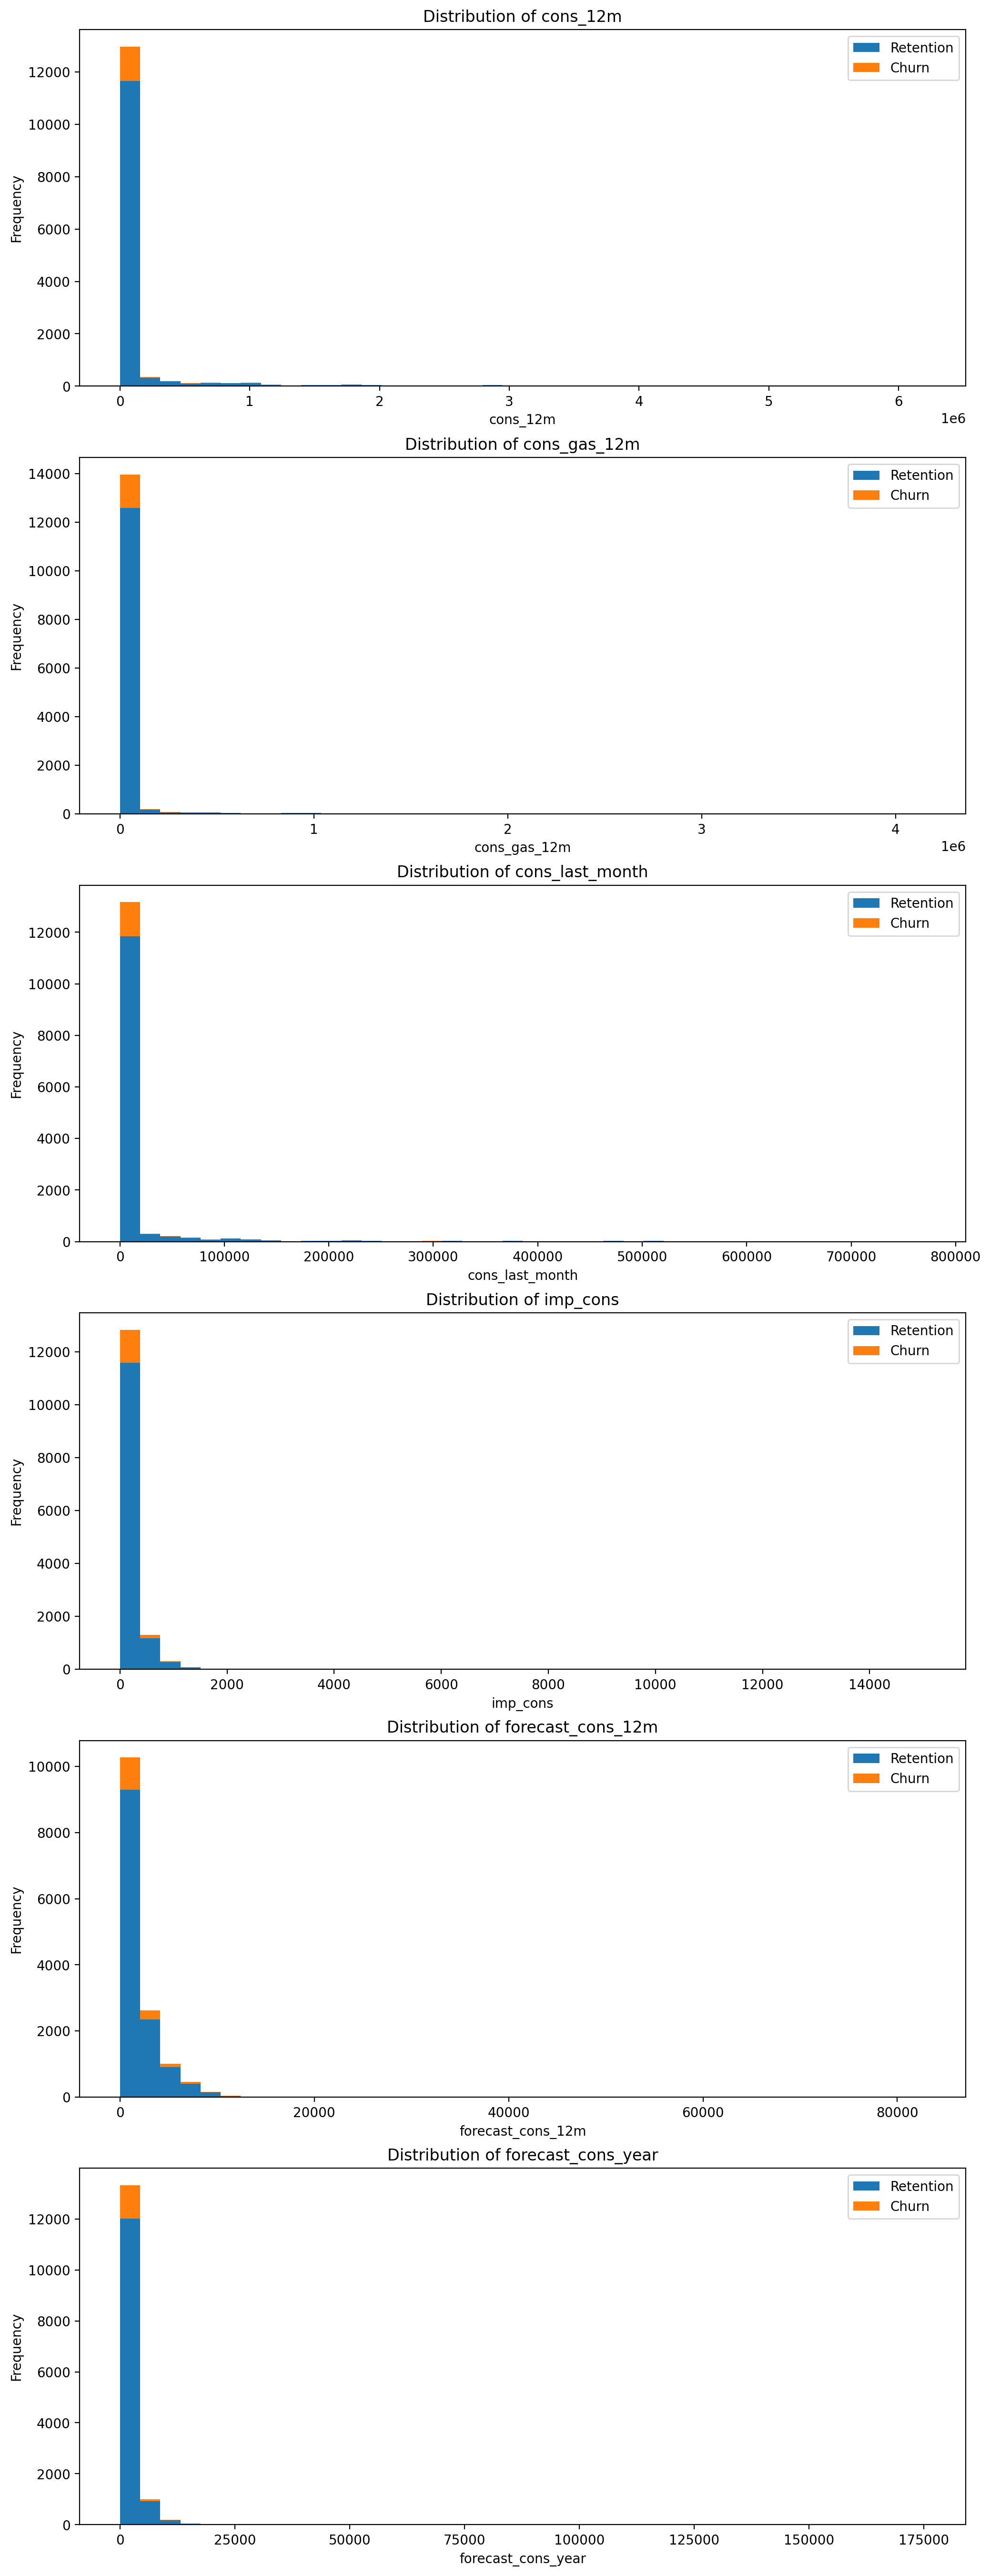

In [30]:
fig, axs = plt.subplots(6,1,figsize=(12,34), dpi=200)
for ax, column in zip(axs,['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m', 'forecast_cons_year']):
    temp = pd.DataFrame({"Retention": client_df[client_df["churn"]==0][column],
    "Churn":client_df[client_df["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=40, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column}')
plt.show()

In [31]:
# the distribution of features is highly positively skewed.

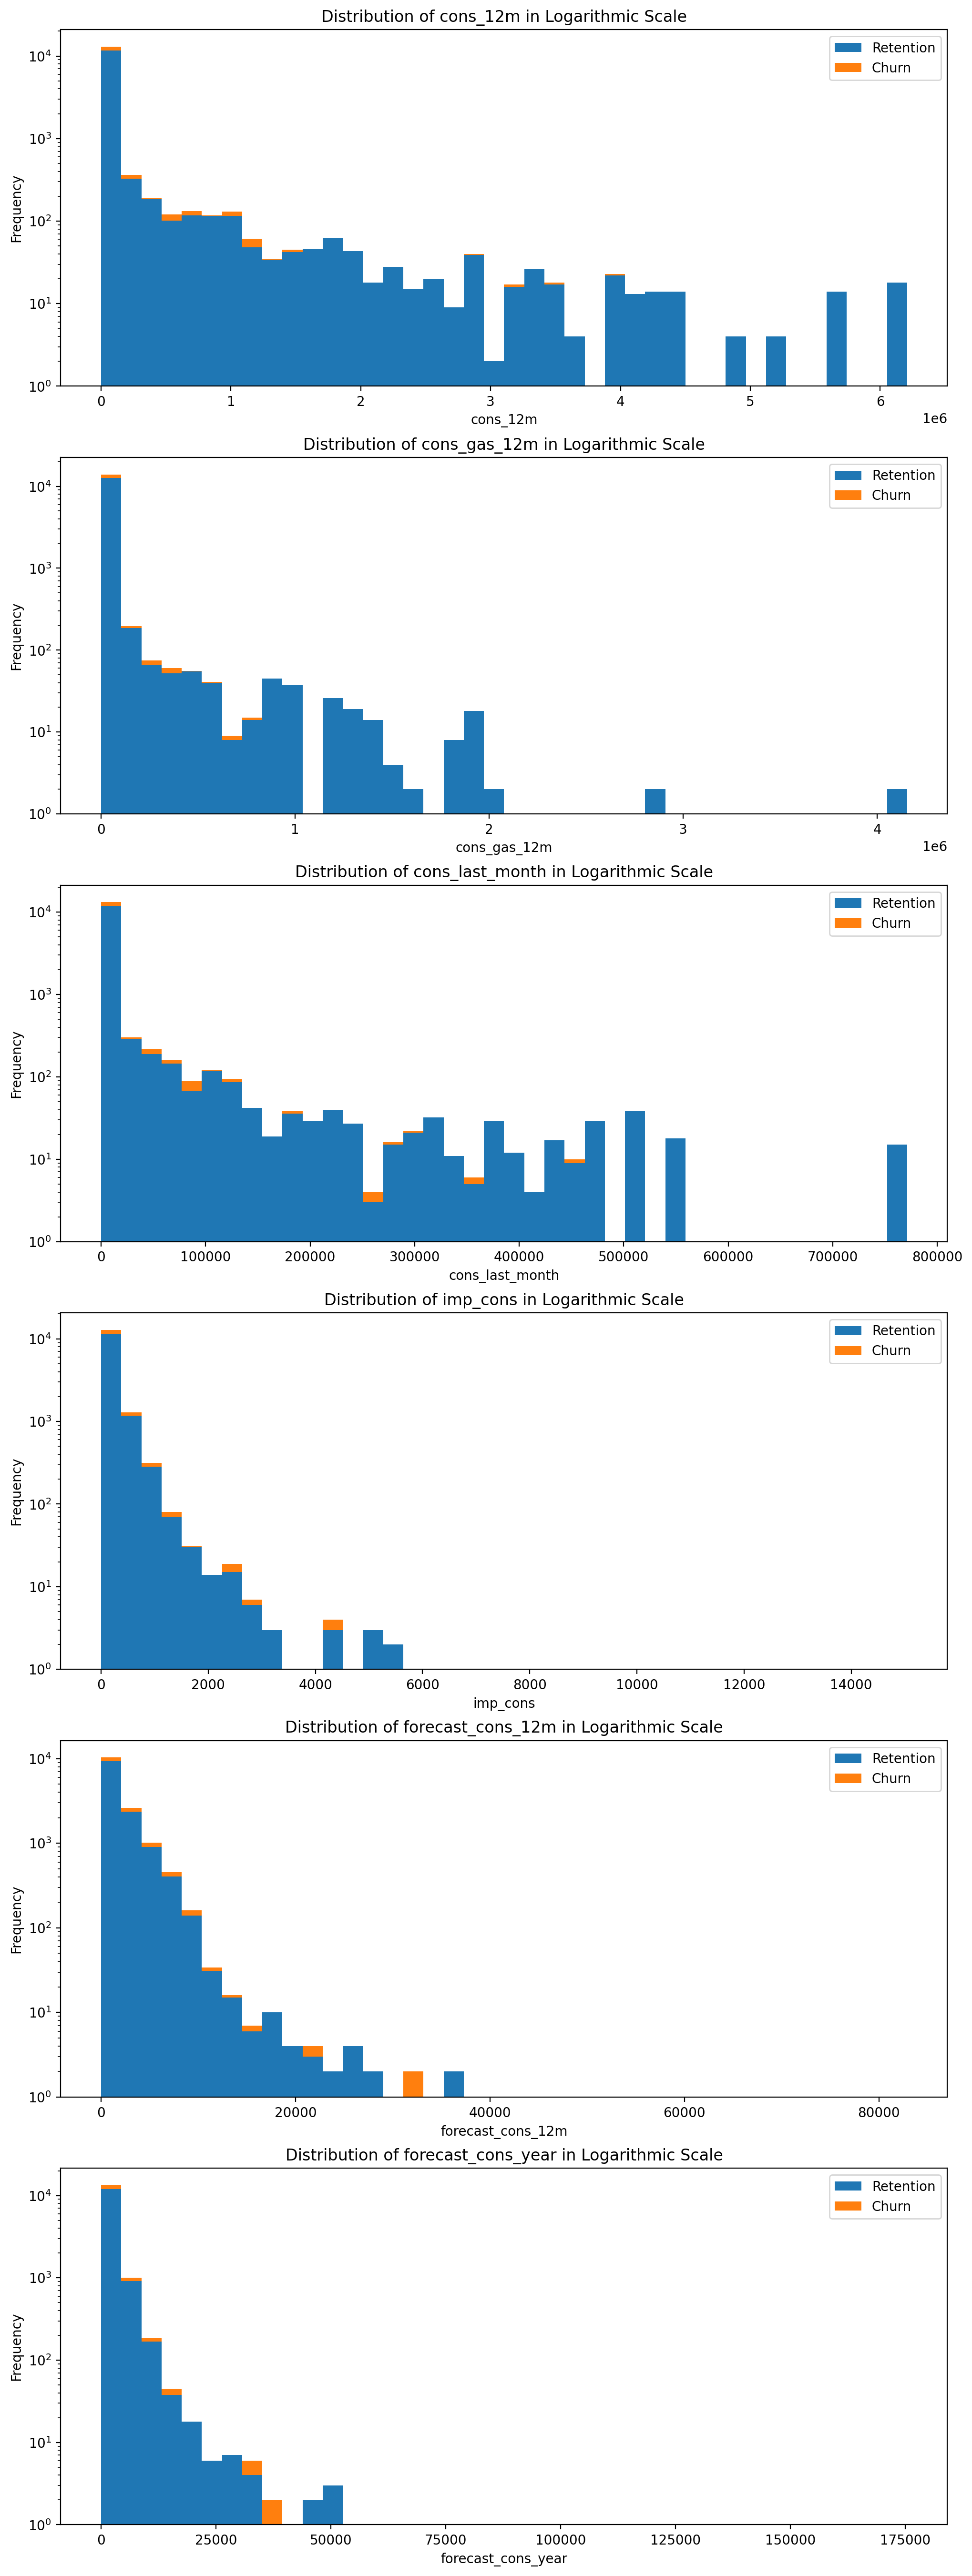

In [32]:
fig, axs = plt.subplots(6,1,figsize=(12,34), dpi=200)
for ax, column in zip(axs,['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m', 'forecast_cons_year']):
    temp = pd.DataFrame({"Retention": client_df[client_df["churn"]==0][column],
    "Churn":client_df[client_df["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=40, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column} in Logarithmic Scale')
    ax.set_yscale('log')
plt.show()

In [33]:
# positively skewed
# there are very few SME that consume relatively larger
#amount of energy or gas than the absolute majority of other clients.

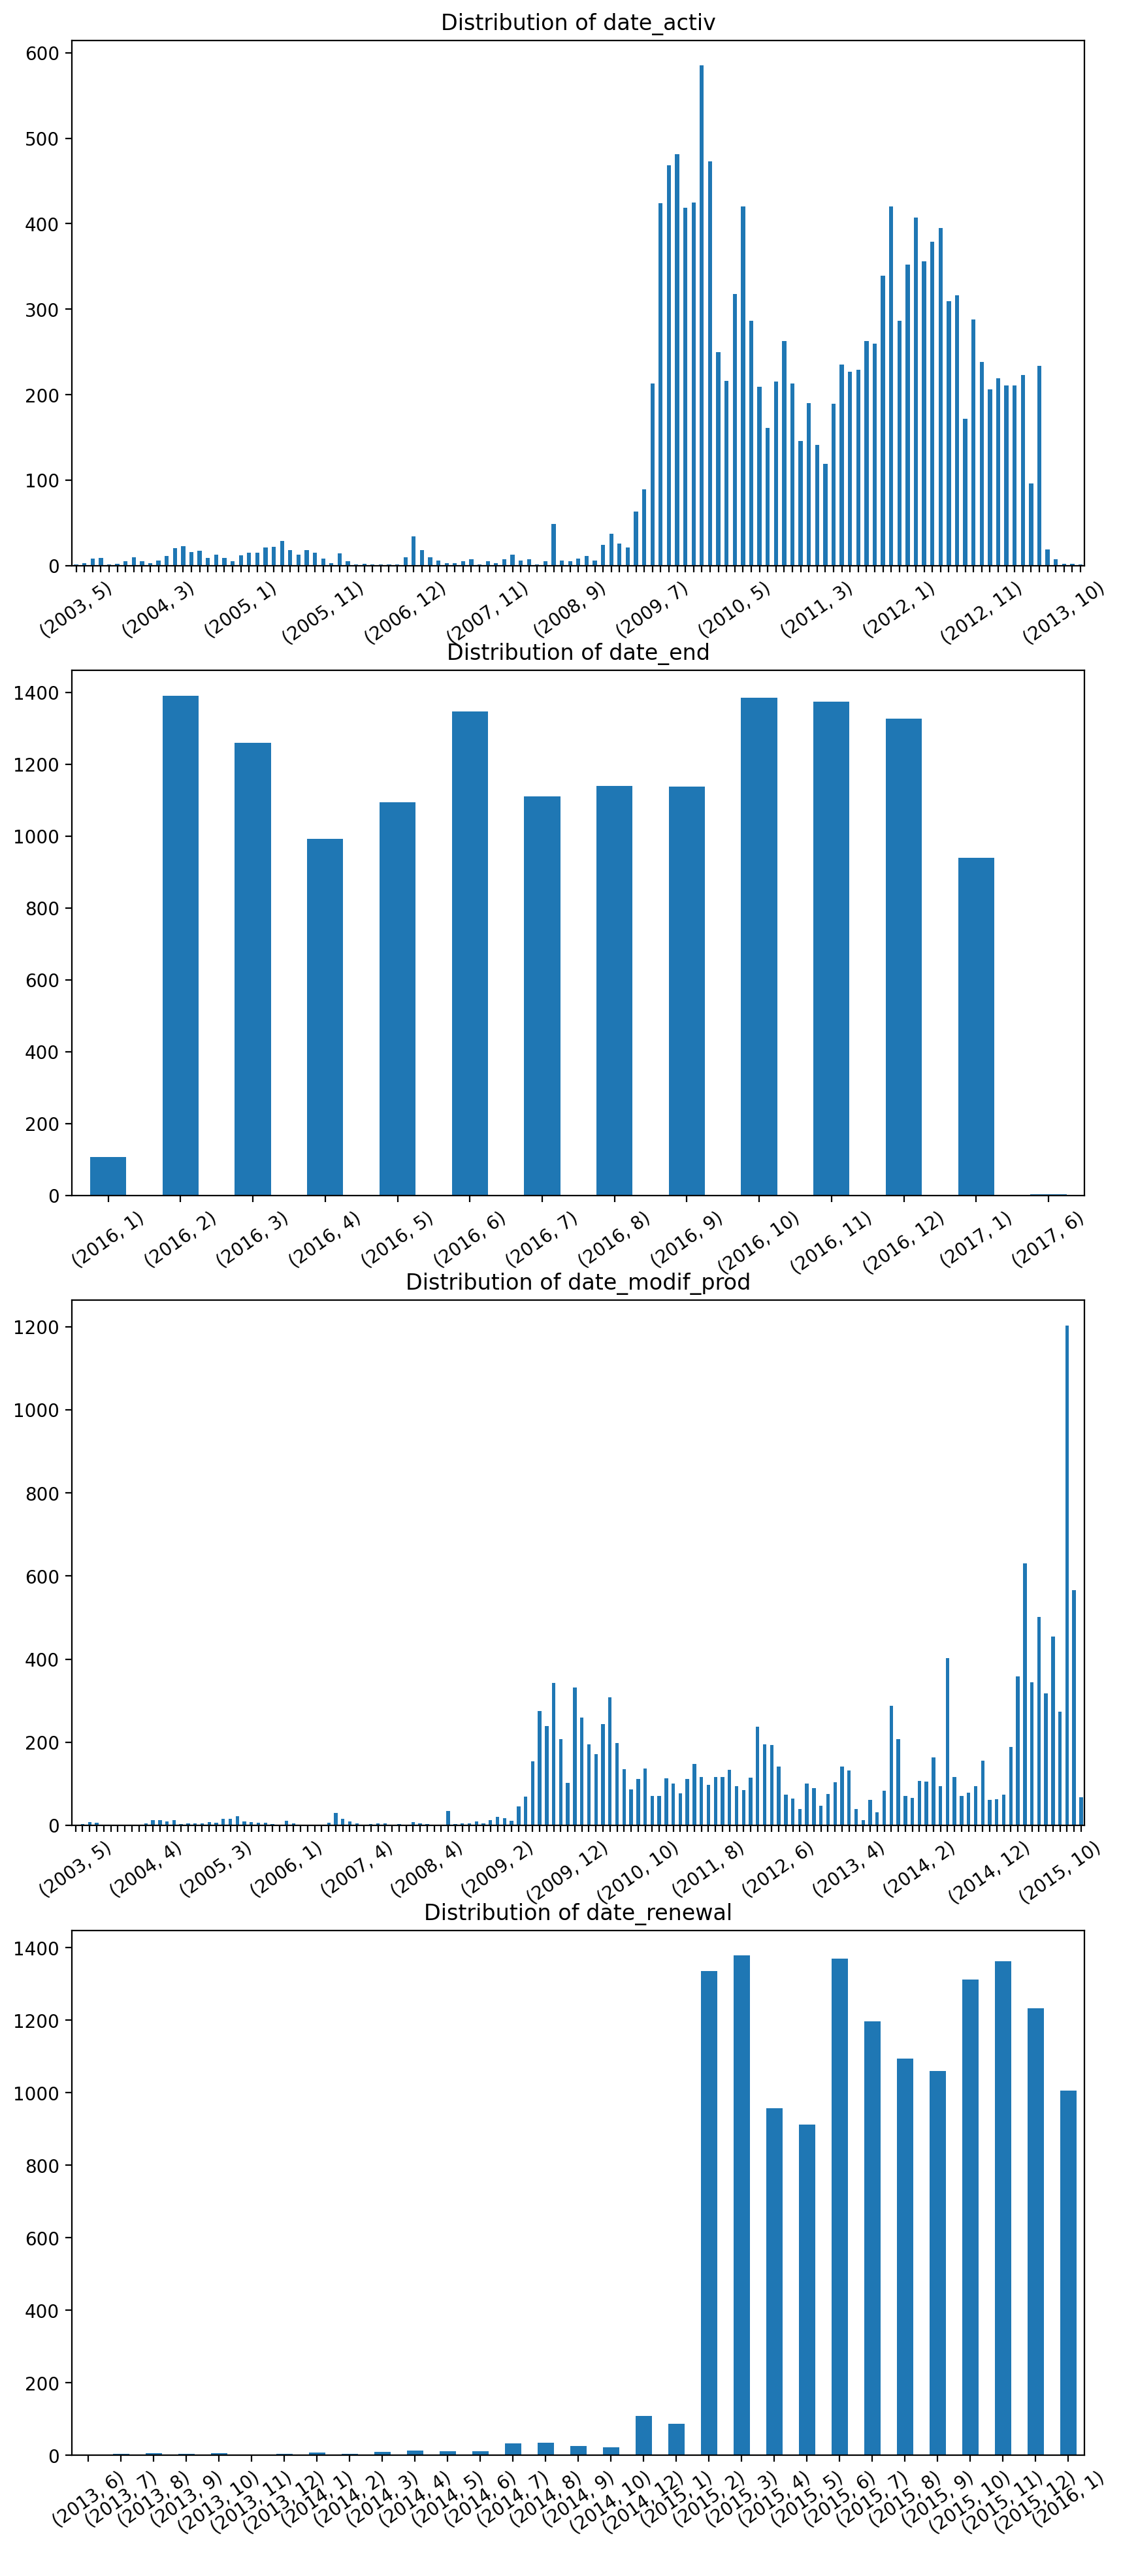

In [34]:
fig, axs = plt.subplots(4,1,figsize=(10,24), dpi=200)
for ax, column in zip(axs,['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']):
    temp = client_df[column].value_counts()
    client_df.groupby([client_df[column].dt.year, client_df[column].dt.month])['id'].count().plot(kind="bar", ax=ax)
    # sns.histplot(temp, bins=20, ax=ax)
    ax.set_xlabel(' ')
    ax.set_title(f'Distribution of {column}')
    plt.xticks(rotation = 45)
    xticks = ax.xaxis.get_major_ticks()
    if len(xticks)>40:
        for i in range(len(xticks)):
            if i%10 != 0:
                xticks[i].label1.set_visible(False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(35)
plt.show()

In [35]:
#**Insights**
#- Most customers are acquired between mid 2009 and the beginning 2013.
#- All the contracts in the dataset will expire on 2016 or January, 2017.
#- With the increase in customer acquisition, there was an increase in modifications of the product.
#- Most contracts are scheduled to be renewed by 2015.

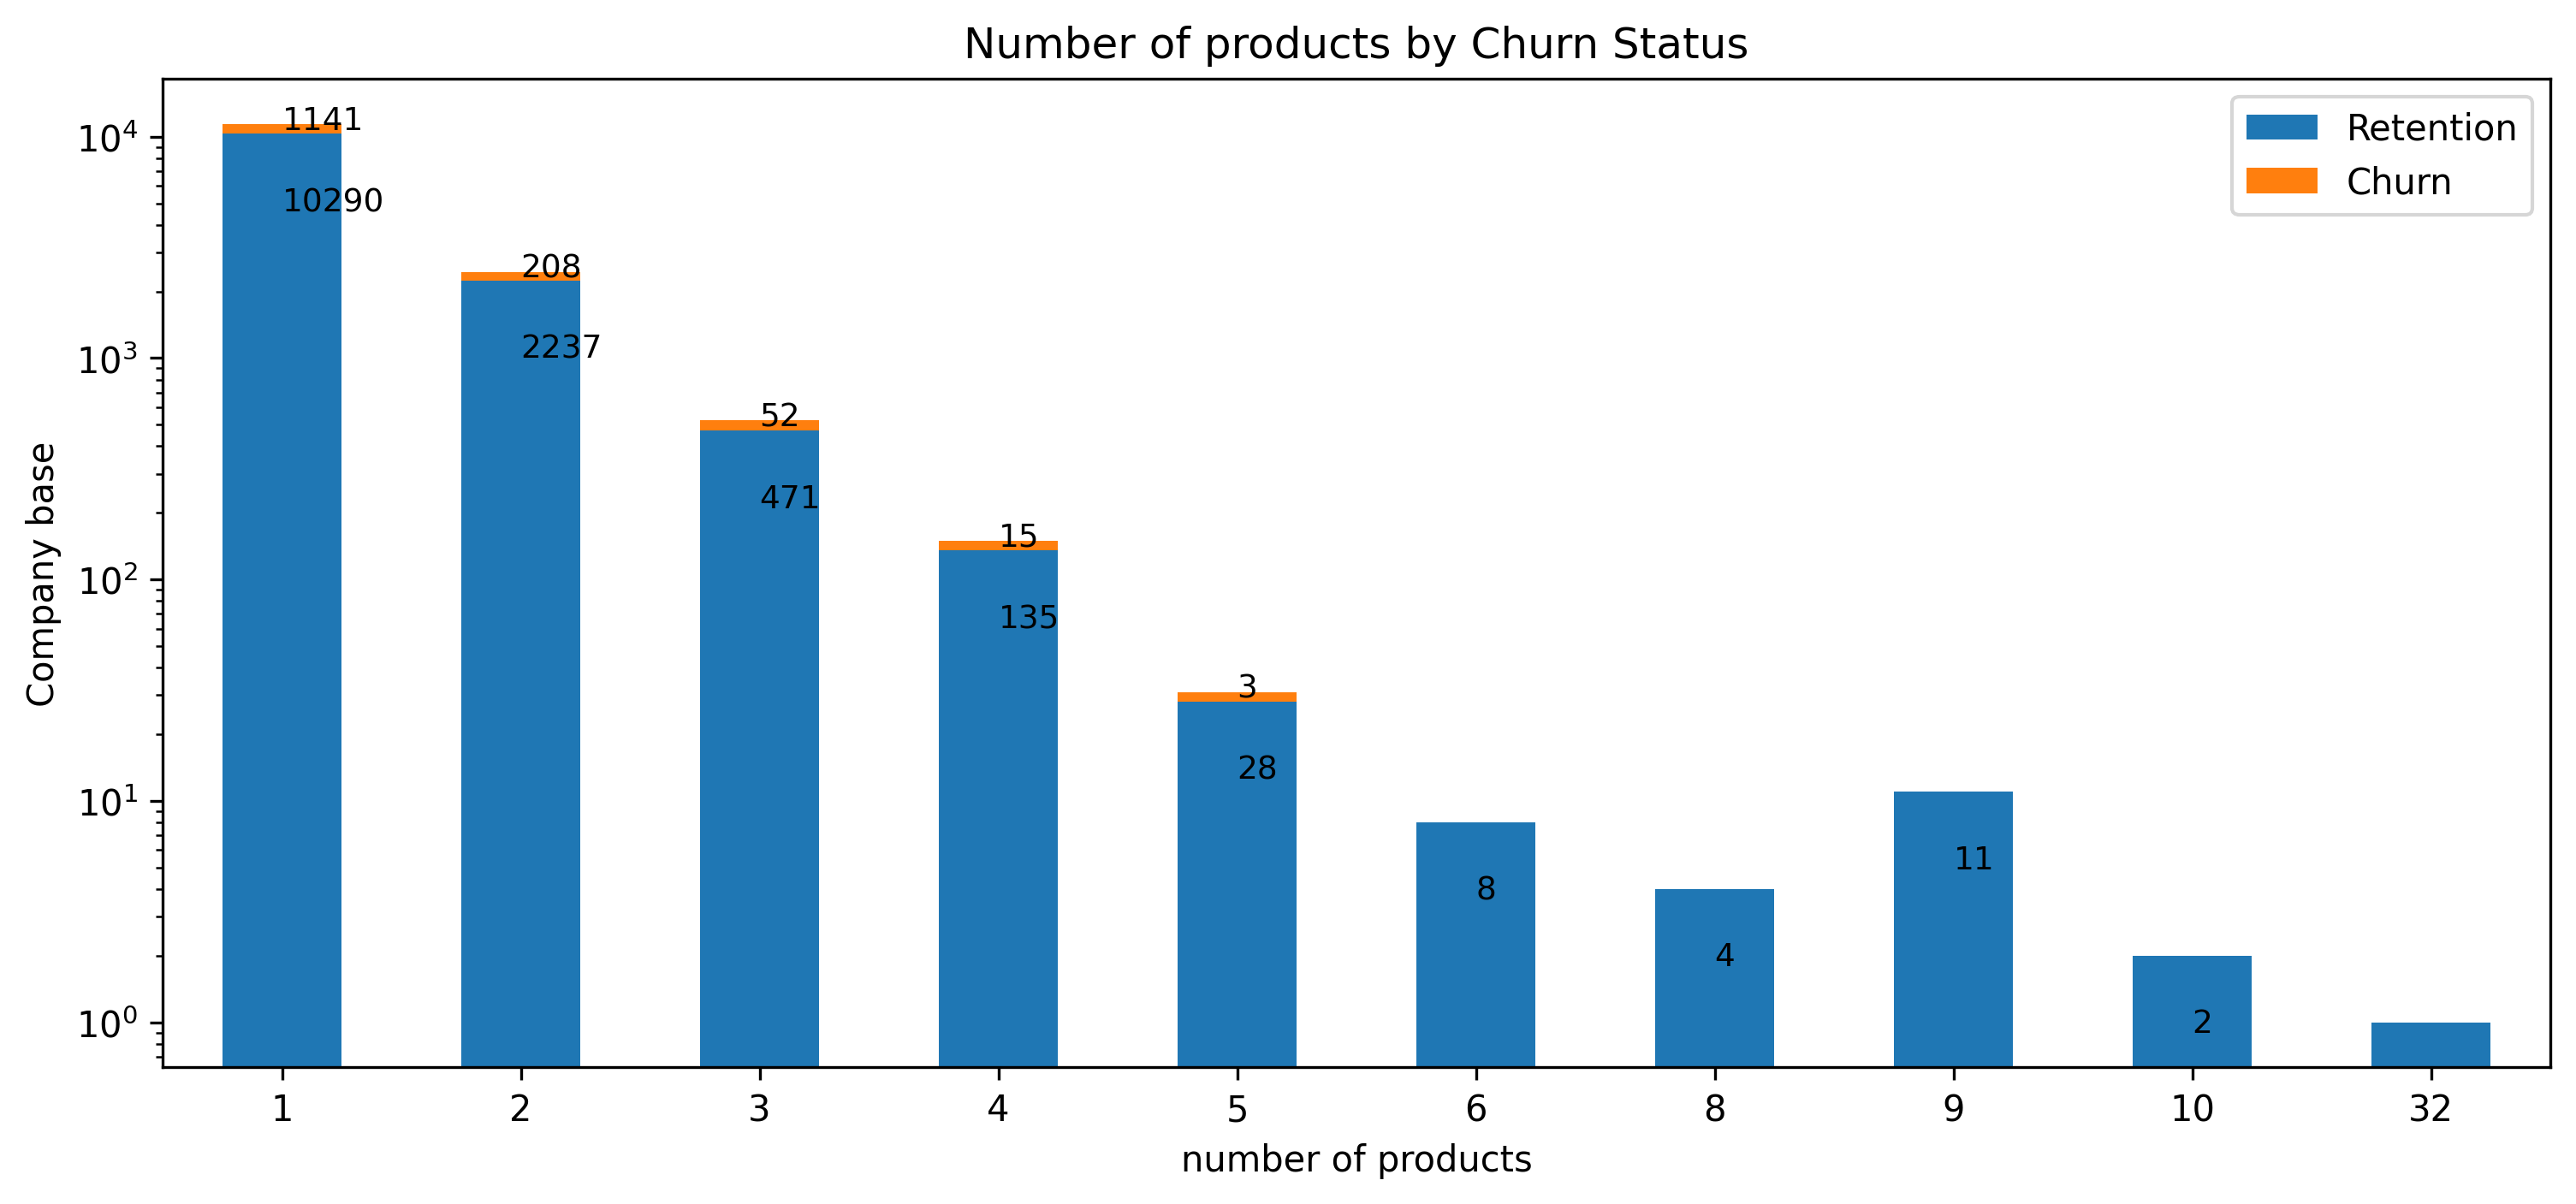

In [36]:
others=client_df[['id','nb_prod_act','num_years_antig','origin_up','churn']]
products=others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
products_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_index()
ax=products.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value[:-2],((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/2*0.9),
               color='black',size=(9))
ax.set_yscale('log')
plt.gcf().set_dpi(300)
plt.xlabel('number of products')
plt.title('Number of products by Churn Status')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base");

In [37]:
#**Insights**
#- **78%** of customers are benefitting of 1 product of PowerCo.
#- **99.8%** have at most 5 active products at a time.
#- SME that churned have less than 5 active products with the company.

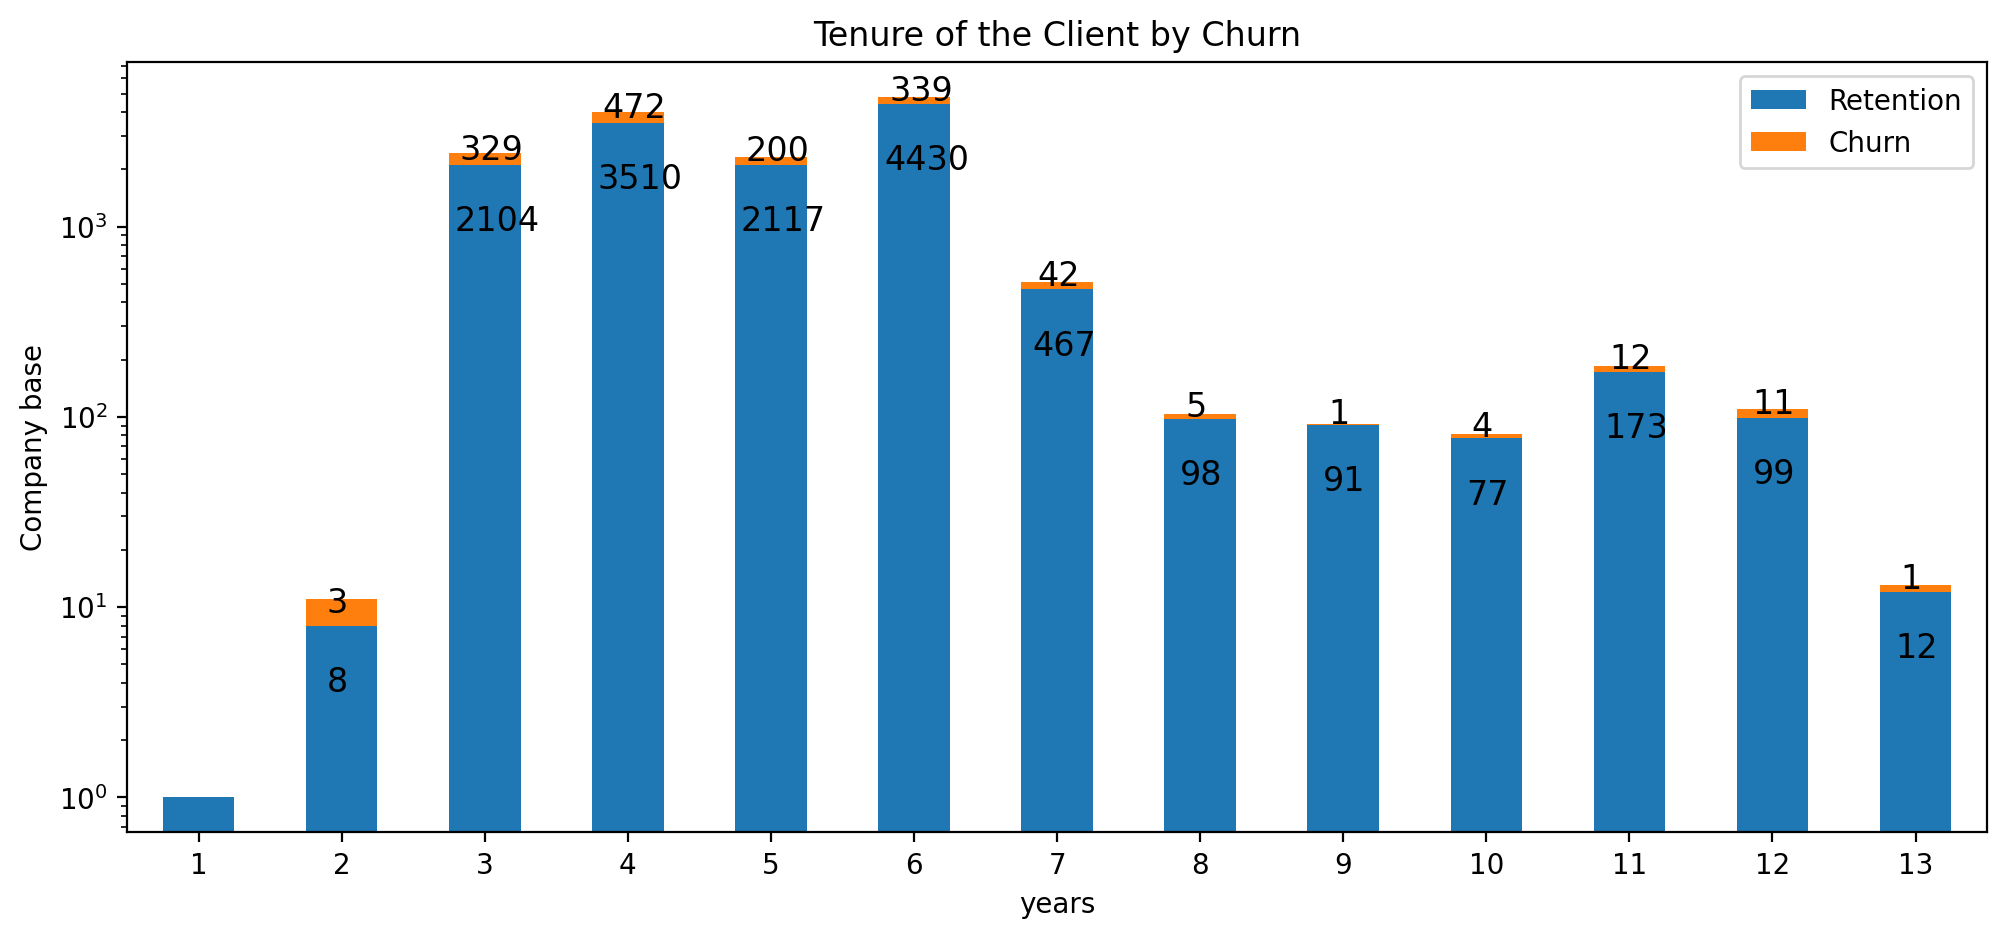

In [38]:
years_antig=others.groupby([others['num_years_antig'],others['churn']])['id'].count().unstack(level=1)
ax=years_antig.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value[:-2],((p.get_x()+p.get_width()/2)-0.035*len(value),p.get_y()+p.get_height()/2*0.9),
               color='black',size=(12))
ax.set_yscale('log')
plt.gcf().set_dpi(200)
plt.xlabel('years')
plt.title('Tenure of the Client by Churn')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base");

In [39]:
# ANTIQUITY OF THE CLIENT : refers to the length of time that a client has been doing
#business with a company.It can be used to describe the historical relationship between 
#client and company, including frequency and duration of transaction,
#and level of loyalty & trust developed over time.

In [40]:
#**Antiquity of the client:** refers to the length of time that a 
#client has been doing business with a company. It can be used to 
#describe the historical relationship between the client and the company, 
#including the frequency and duration of transactions, as well as the level
#of loyalty and trust that has developed over time.

#**Insights**
#- **94.4%** of SME clients who churned have been with the company 
#between **3** to **6** years.
#- A concerning number of **28** SME have churned after being clients
#for PowerCo for more than **10** years.

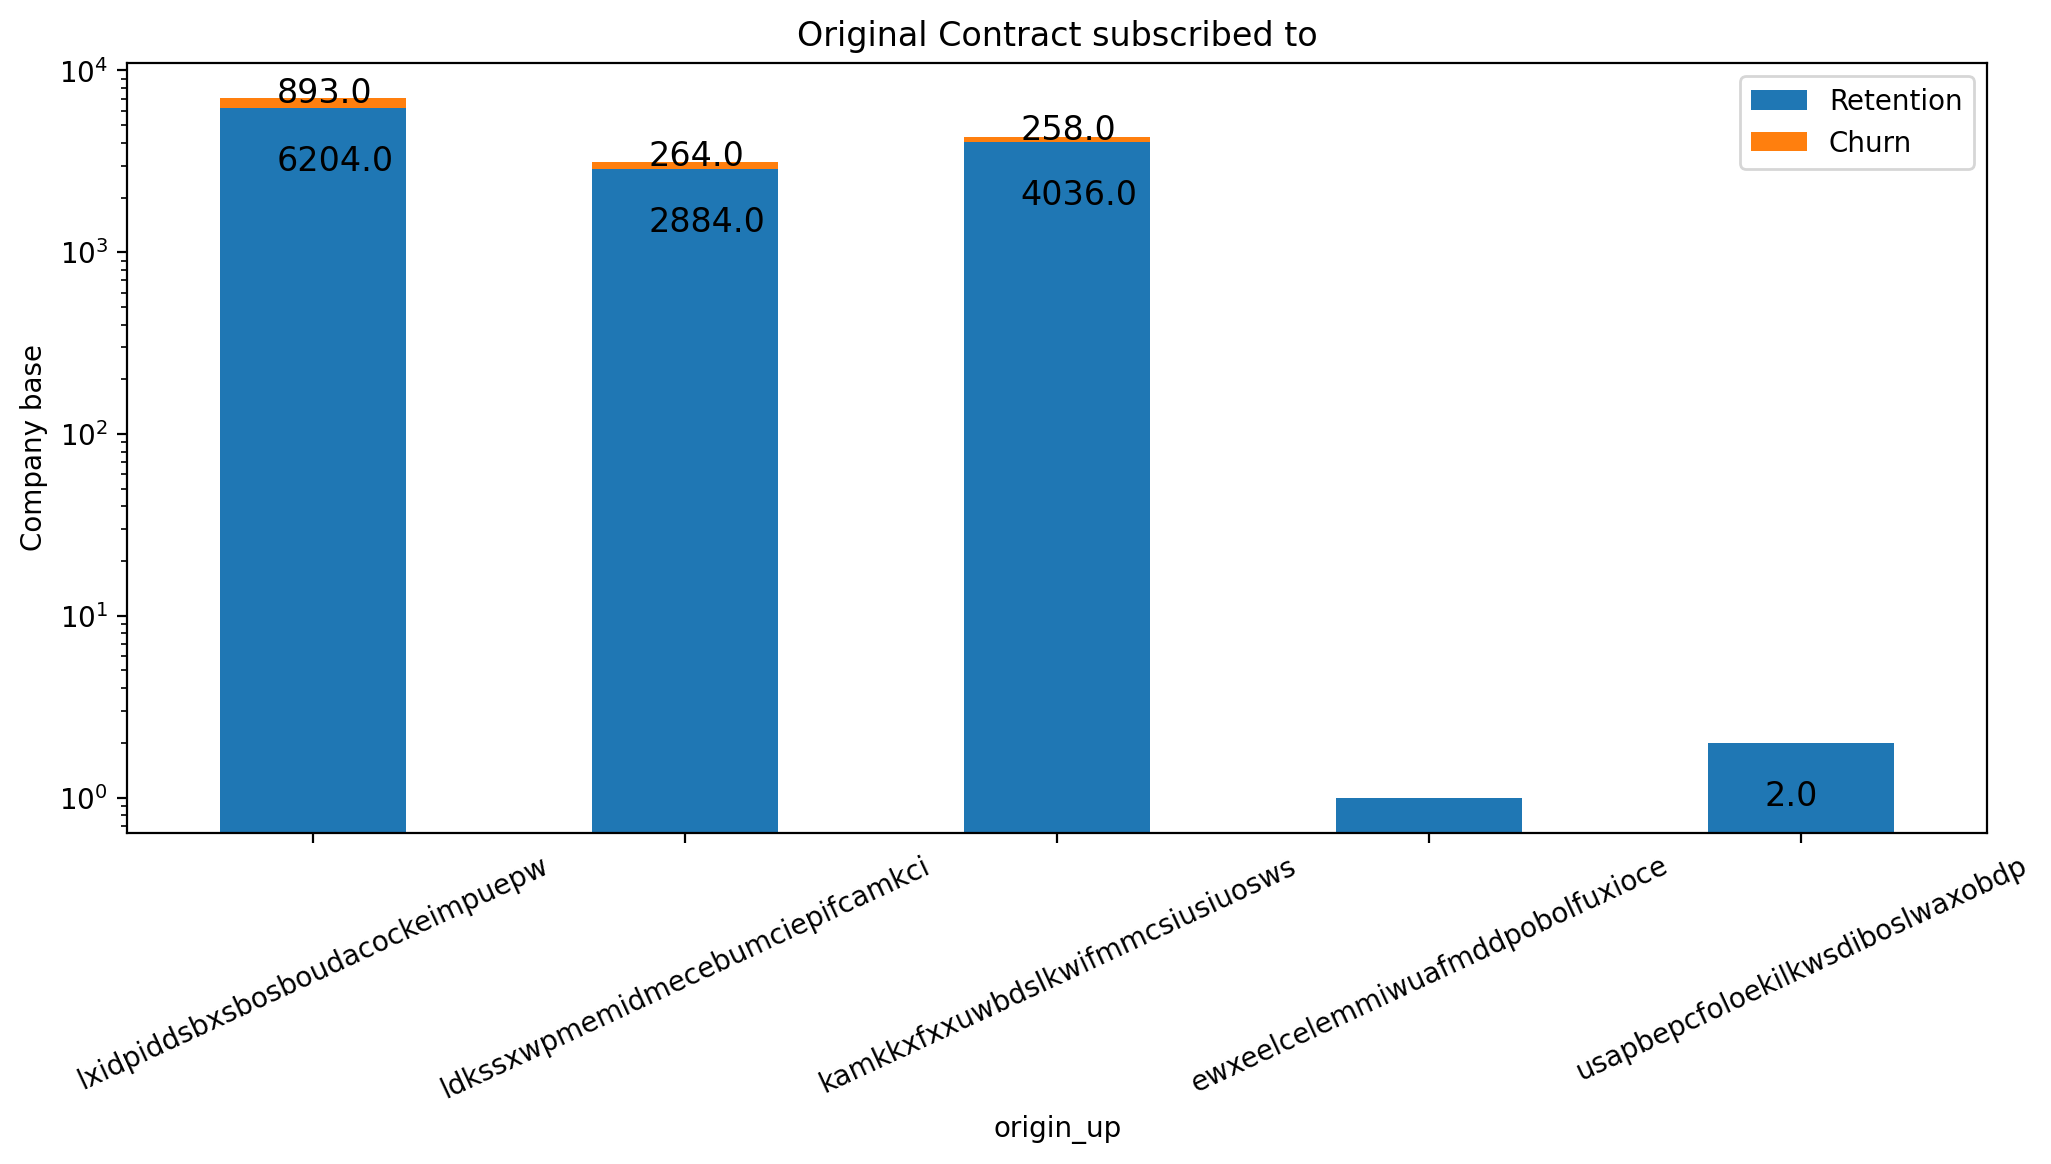

In [41]:
origin_up=client_df.groupby([client_df['origin_up'],client_df['churn']])['id'].count().unstack(level=1)
origin_up.sort_values(1, ascending=False, inplace=True)
ax=origin_up.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)-0.1,p.get_y()+p.get_height()/2*0.9),
               color='black',size=(12))
ax.set_yscale('log')
plt.gcf().set_dpi(200)
plt.title('Original Contract subscribed to')
plt.legend(['Retention','Churn'],loc="upper right")
plt.xticks(rotation=25)
plt.ylabel("Company base");

In [42]:
#**Insights**
#- Churn is happening in 3 offers only but we can't 
#take that into account since the other 2 offers aren't widely used 
#(only 3 clients).
#- `lxidpiddsbxsbosboudacockeimpuepw` plan has the highest churn probability
#of **14.4%**.

In [43]:

price_df.sort_values('price_date', inplace=True)
grouped_df = price_df.groupby('id')
first_half = grouped_df.head(6).groupby('id').mean()
first_half.columns = ['first_'+column for column in first_half.columns]
last_half = grouped_df.tail(6).groupby('id').mean()
last_half.columns = ['last_'+column for column in last_half.columns]

In [44]:
result_df = pd.concat([first_half, last_half], axis=1)
result_df.reset_index(inplace=True)
result_df = pd.merge(result_df, client_df[['id','churn']], on="id")
result_df

,id,first_price_date,first_price_off_peak_var,first_price_peak_var,first_price_mid_peak_var,first_price_off_peak_fix,first_price_peak_fix,first_price_mid_peak_fix,last_price_date,last_price_off_peak_var,last_price_peak_var,last_price_mid_peak_var,last_price_off_peak_fix,last_price_peak_fix,last_price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,2015-03-17 04:00:00,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0
1,0004351ebdd665e6ee664792efc4fd13,2015-03-17 04:00:00,0.148166,0.000000,0.000000,44.326191,0.000000,0.000000,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-03-17 04:00:00,0.161093,0.000000,0.000000,44.694710,0.000000,0.000000,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-03-17 04:00:00,0.149668,0.000000,0.000000,44.266931,0.000000,0.000000,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-03-17 04:00:00,0.129145,0.106976,0.074372,40.728885,24.437330,16.291555,2015-09-15 20:00:00,0.123007,0.104108,0.075469,40.728885,24.437330,16.291555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,2015-03-17 04:00:00,0.126409,0.104273,0.072331,40.565970,24.339580,16.226388,2015-09-15 20:00:00,0.118442,0.100477,0.072089,40.647429,24.388454,16.258969,0
14602,fffac626da707b1b5ab11e8431a4d0a2,2015-03-17 04:00:00,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,2015-09-15 20:00:00,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0
14603,fffc0cacd305dd51f316424bbb08d1bd,2015-03-17 04:00:00,0.154998,0.131427,0.098280,41.091456,24.854206,16.735583,2015-09-15 20:00:00,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,2015-03-17 04:00:00,0.127566,0.105428,0.073487,40.565970,24.339580,16.226388,2015-09-15 20:00:00,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0


In [46]:
means = result_df.groupby('churn').mean(numeric_only=True).reset_index()
means

,churn,first_price_off_peak_var,first_price_peak_var,first_price_mid_peak_var,first_price_off_peak_fix,first_price_peak_fix,first_price_mid_peak_fix,last_price_off_peak_var,last_price_peak_var,last_price_mid_peak_var,last_price_off_peak_fix,last_price_peak_fix,last_price_mid_peak_fix
0,0,0.144467,0.052156,0.027533,42.849776,9.267639,5.979476,0.140284,0.051004,0.027927,42.957777,9.281092,5.987646
1,1,0.144096,0.057301,0.033143,43.103368,11.191712,7.154866,0.139681,0.055834,0.033573,43.220660,11.203630,7.166263


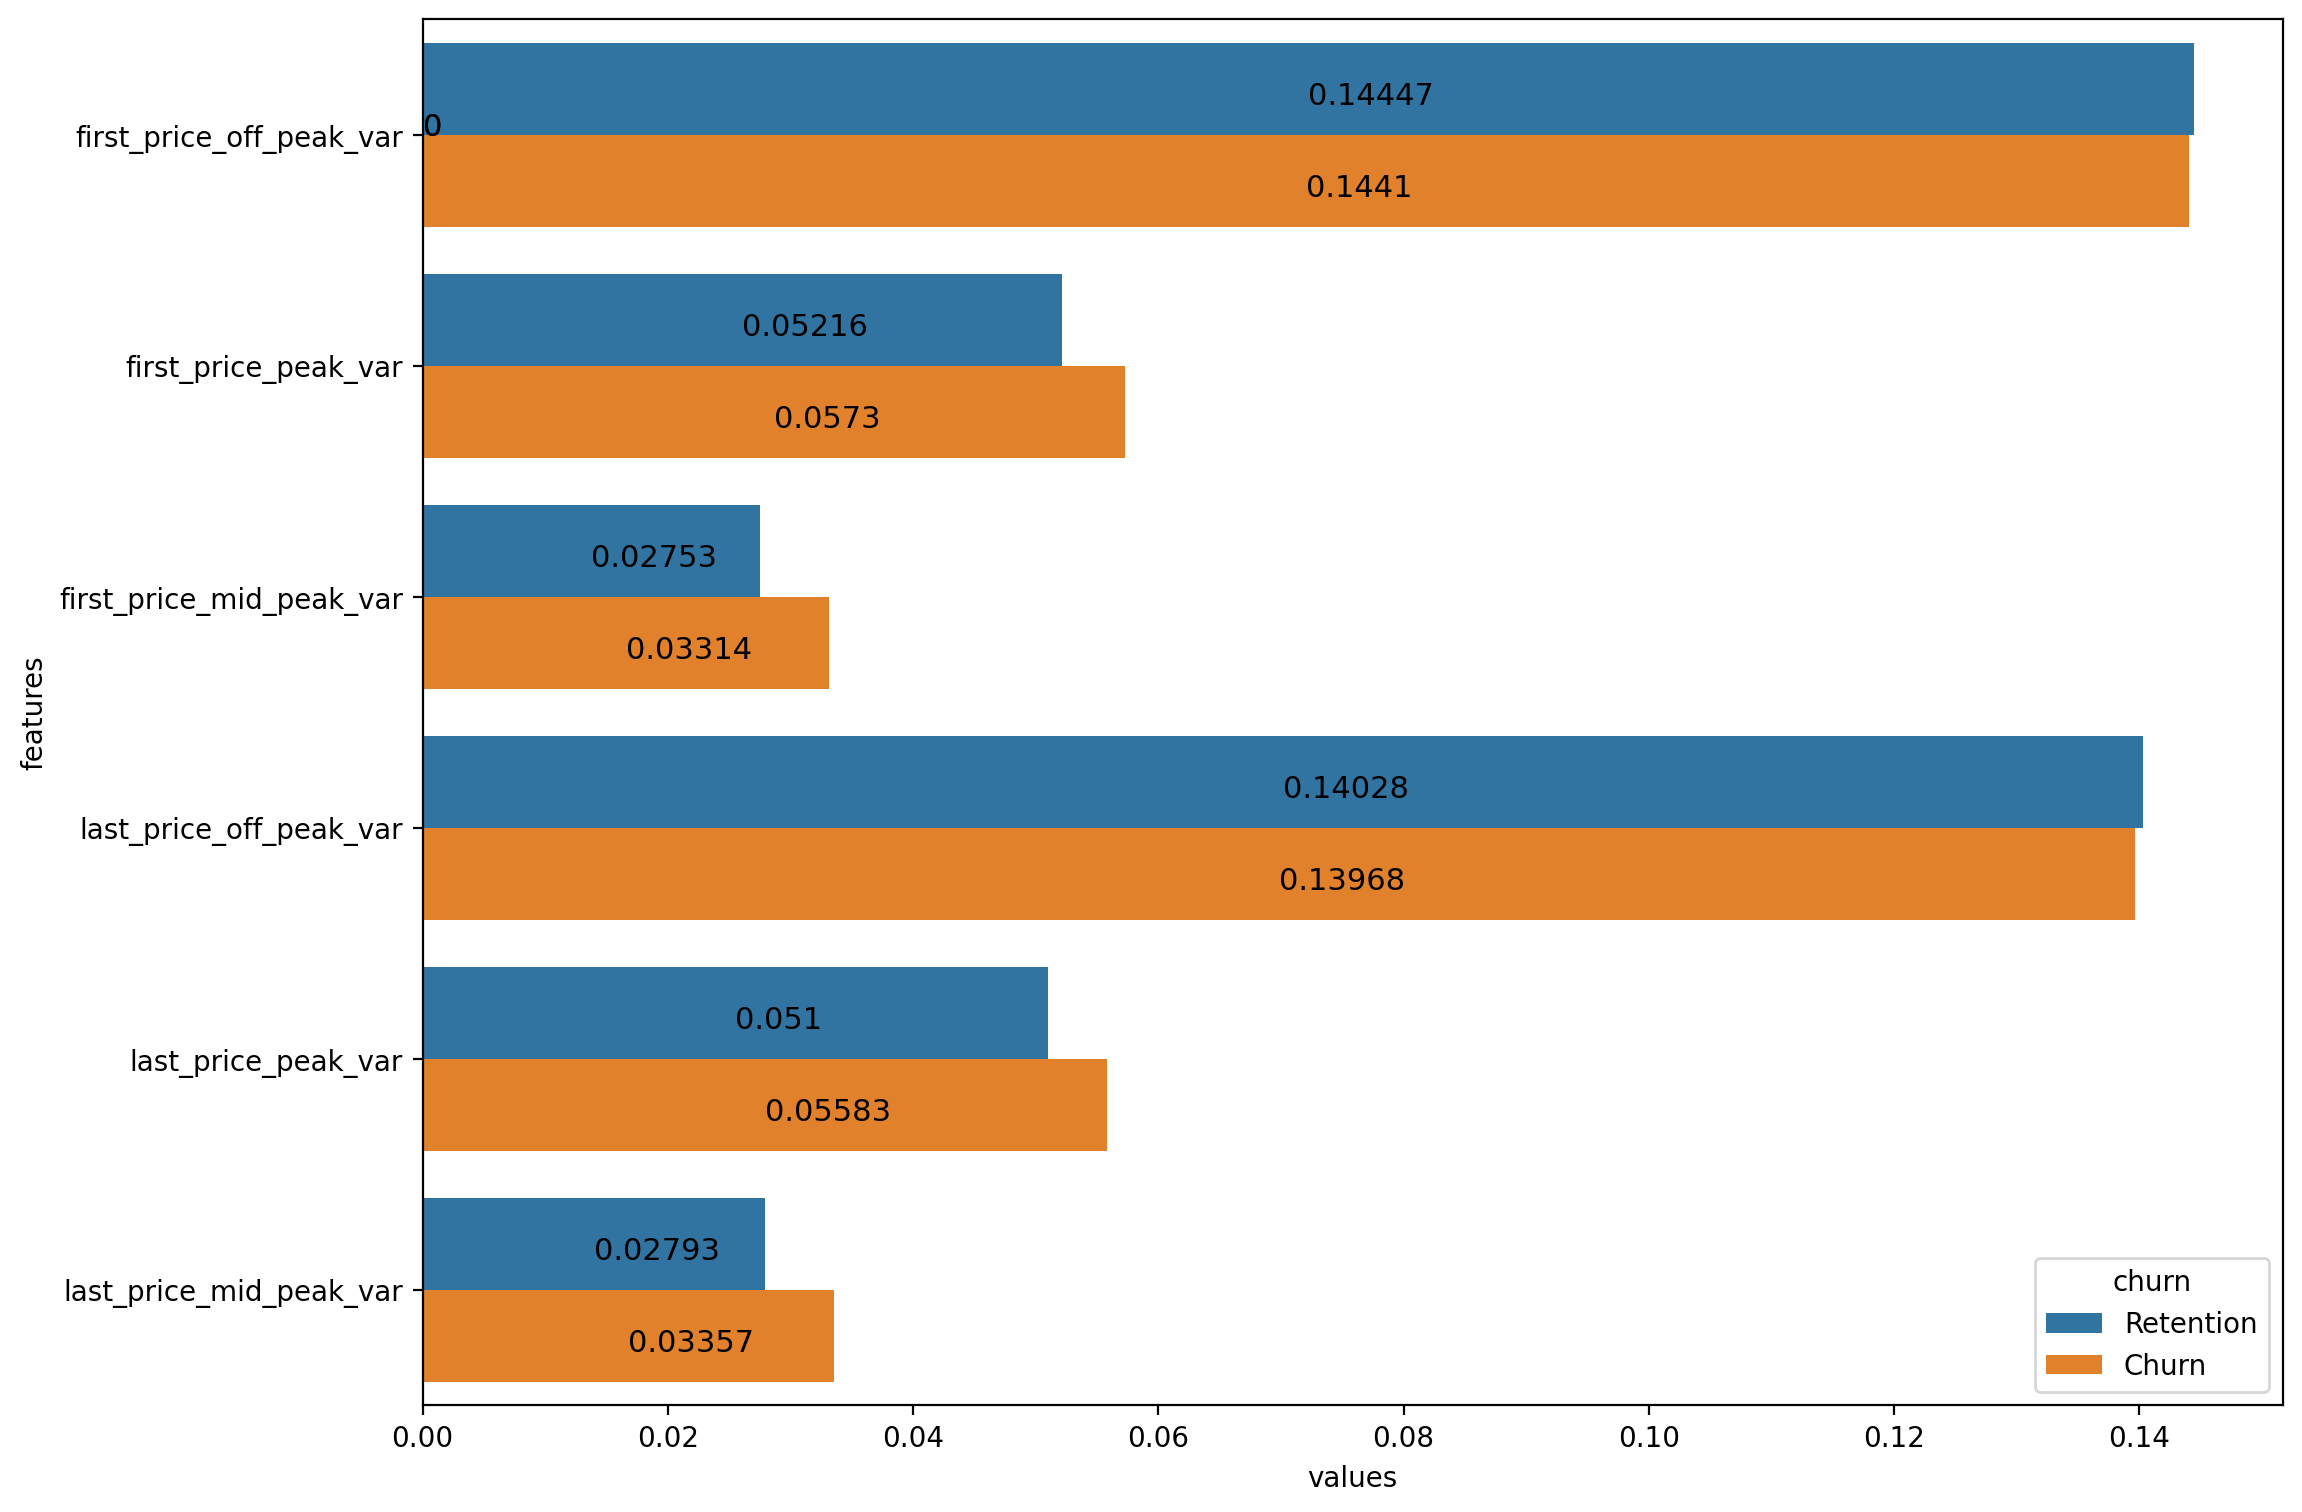

In [47]:
melted_df = pd.melt(means[['churn', 'first_price_off_peak_var', 'first_price_peak_var', 'first_price_mid_peak_var',
                          'last_price_off_peak_var', 'last_price_peak_var', 'last_price_mid_peak_var']], 
                    id_vars=['churn'], var_name='features', value_name='values')
melted_df['churn'] = melted_df['churn'].replace({0: 'Retention', 1: 'Churn'})
# create the bar plot
plt.figure(figsize=(12,9), dpi=200)
sns.barplot(data=melted_df, y='features', x='values', hue='churn')
ax = plt.gca()
for p in ax.patches:
    value=str(round(p.get_width(),5))
    ax.annotate(value,((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/1.5),
               color='black',size=(11))
plt.style.use('classic')
plt.show()

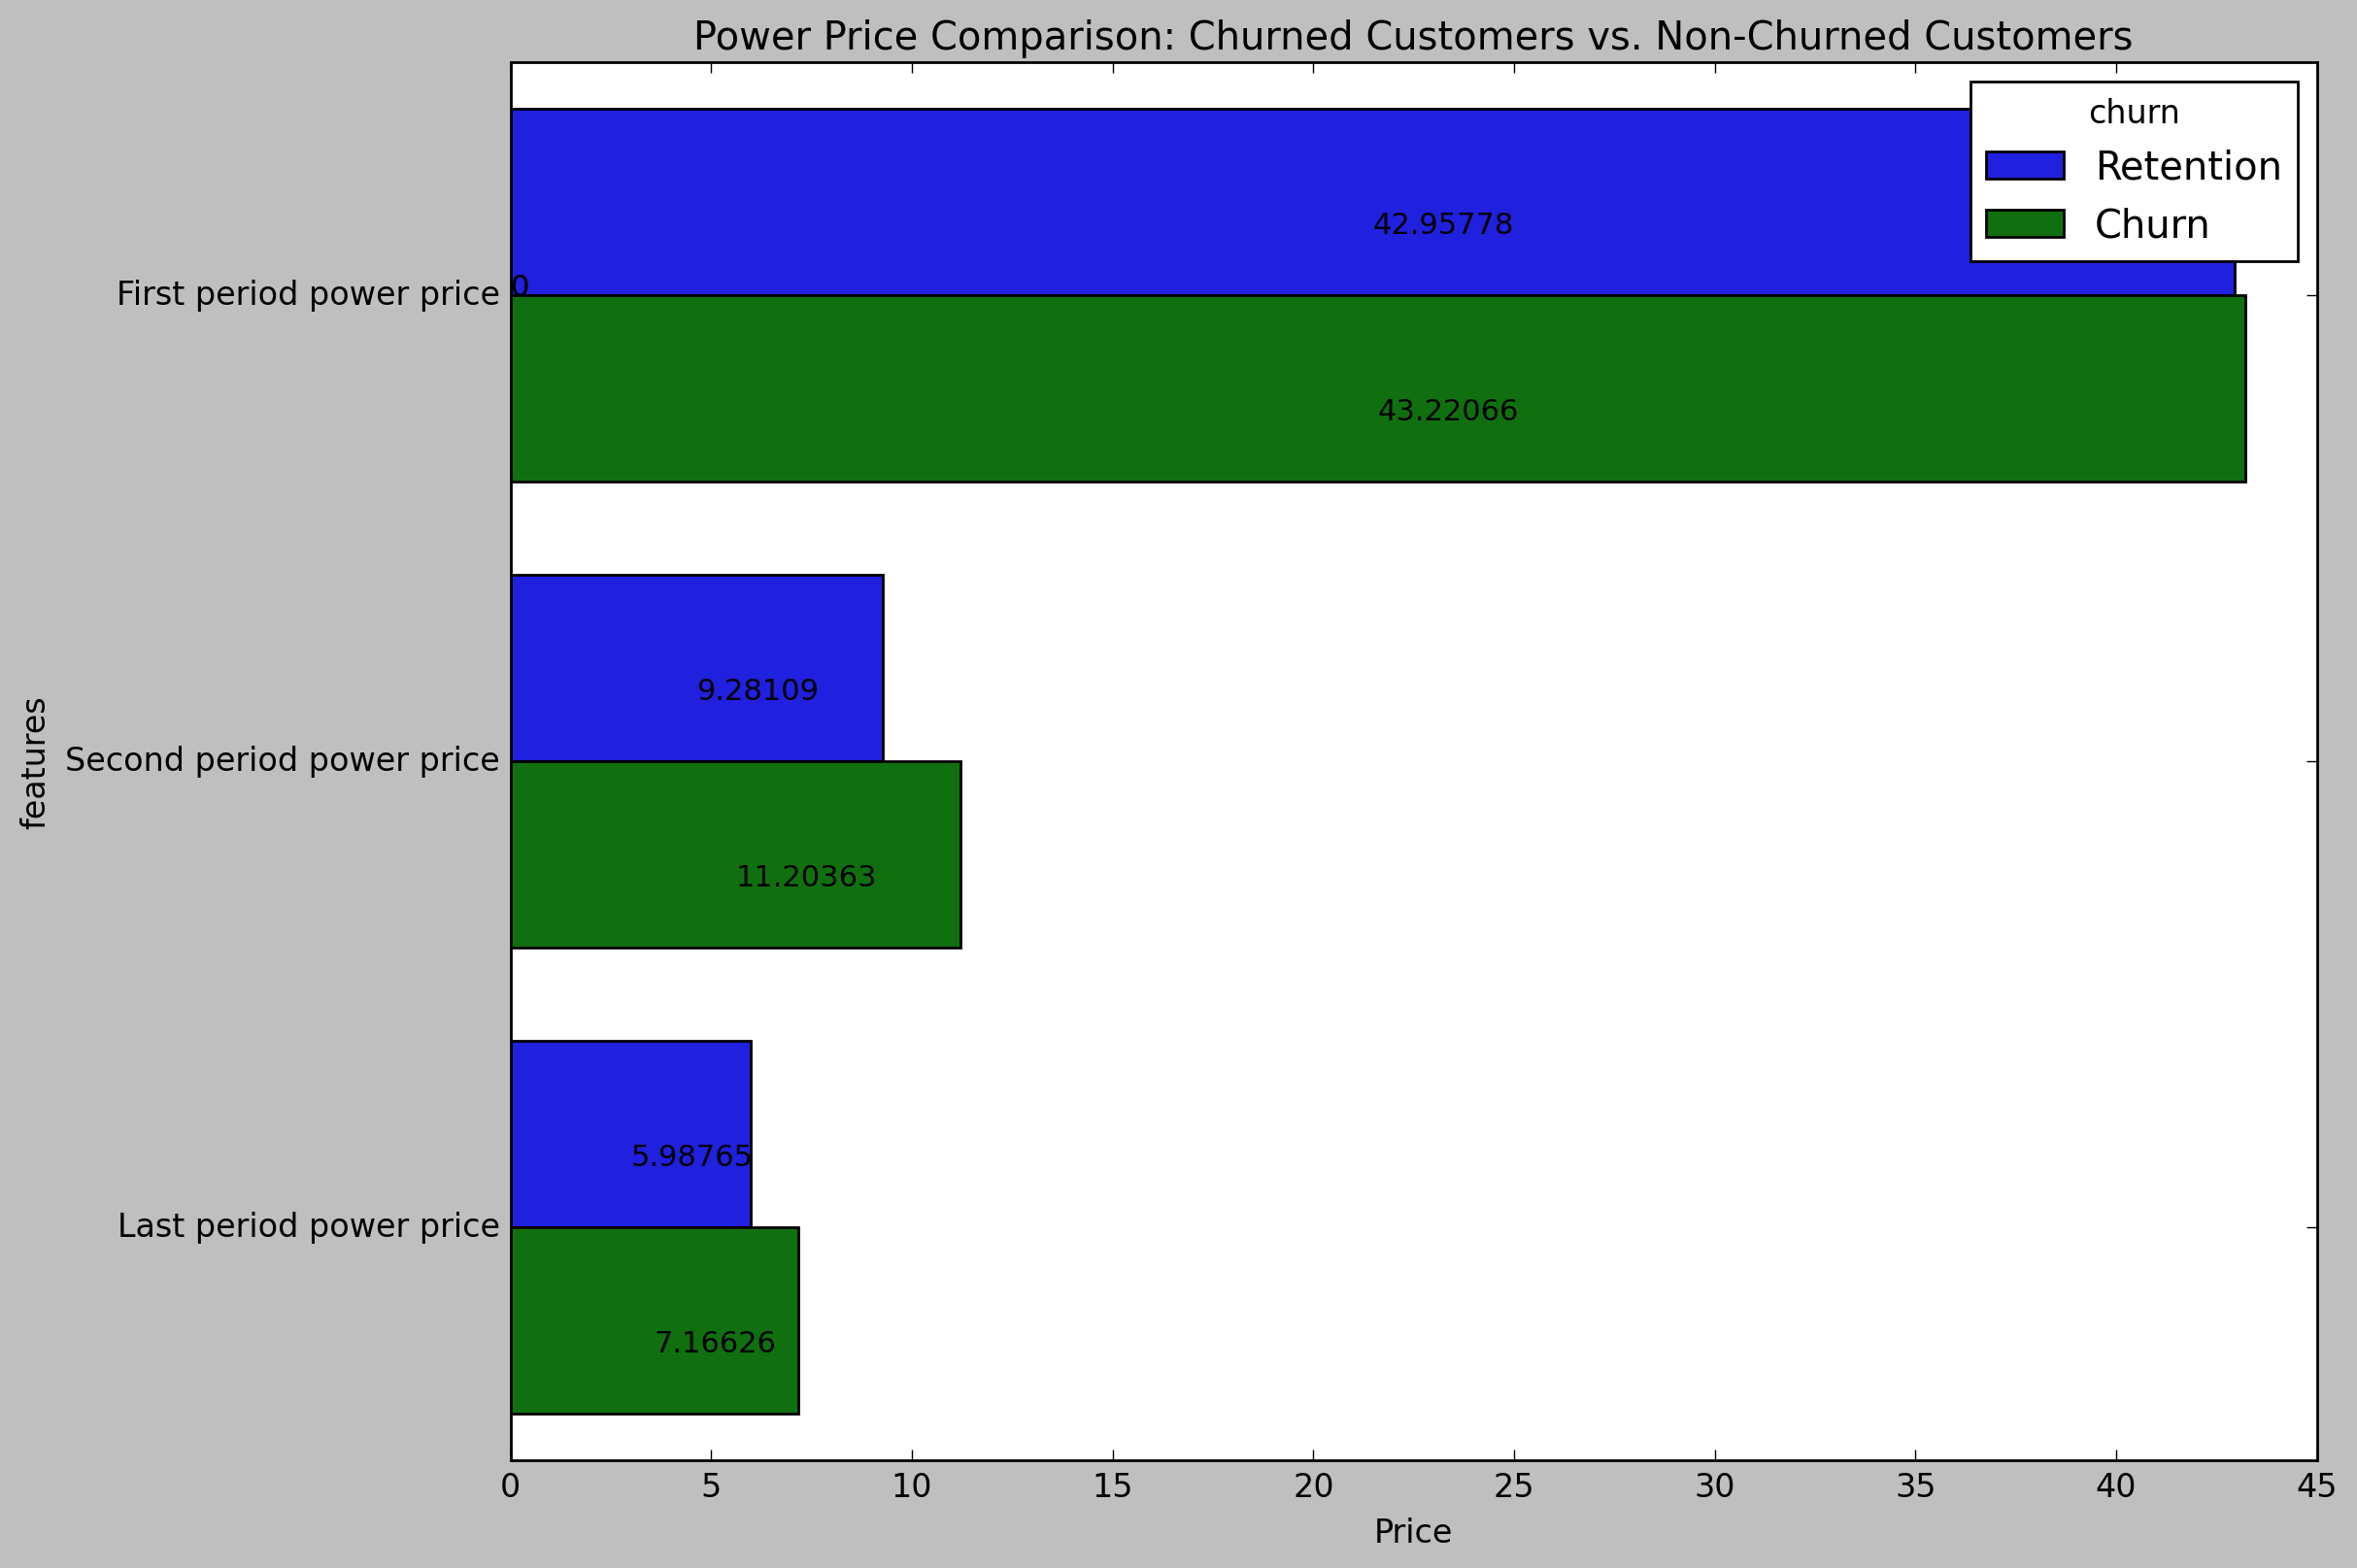

In [48]:
melted_df = pd.melt(means[['churn', 'first_price_off_peak_fix', 'first_price_peak_fix', 'first_price_mid_peak_fix',
                          'last_price_off_peak_fix', 'last_price_peak_fix', 'last_price_mid_peak_fix']], 
                    id_vars=['churn'], var_name='features', value_name='value')
melted_df['churn'] = melted_df['churn'].replace({0: 'Retention', 1: 'Churn'})

melted_df = melted_df[(melted_df['features'] == 'last_price_off_peak_fix') | (melted_df['features'] =='last_price_peak_fix') | (melted_df['features'] =='last_price_mid_peak_fix')]
# create the bar plot
plt.figure(figsize=(12,9), dpi=200)
sns.barplot(data=melted_df, y='features', x='value', hue='churn')
#plt.xscale('log')
plt.xlabel('Price')
plt.title('Power Price Comparison: Churned Customers vs. Non-Churned Customers')
ax = plt.gca()
ax.set_yticks([0, 1, 2])  # Set ticks matching your number of labels
ax.set_yticklabels(['First period power price', 'Second period power price', 'Last period power price'])
for p in ax.patches:
    value=str(round(p.get_width(),5))
    ax.annotate(value,((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/1.5),
               color='black',size=(11))
    plt.style.use('classic')
plt.show()

In [49]:
result_df = price_df.groupby('id').mean().reset_index()
result_df = pd.merge(client_df, result_df, on='id')

In [50]:
#**Insights**
#- The above two barplots show that churned SME tend to pay more than 
#those who are still customers. Which suggests that the pricing strategy
#is the reason of churn.
#- There is an increase in price for all companies due to the increased 
#cost of energy.

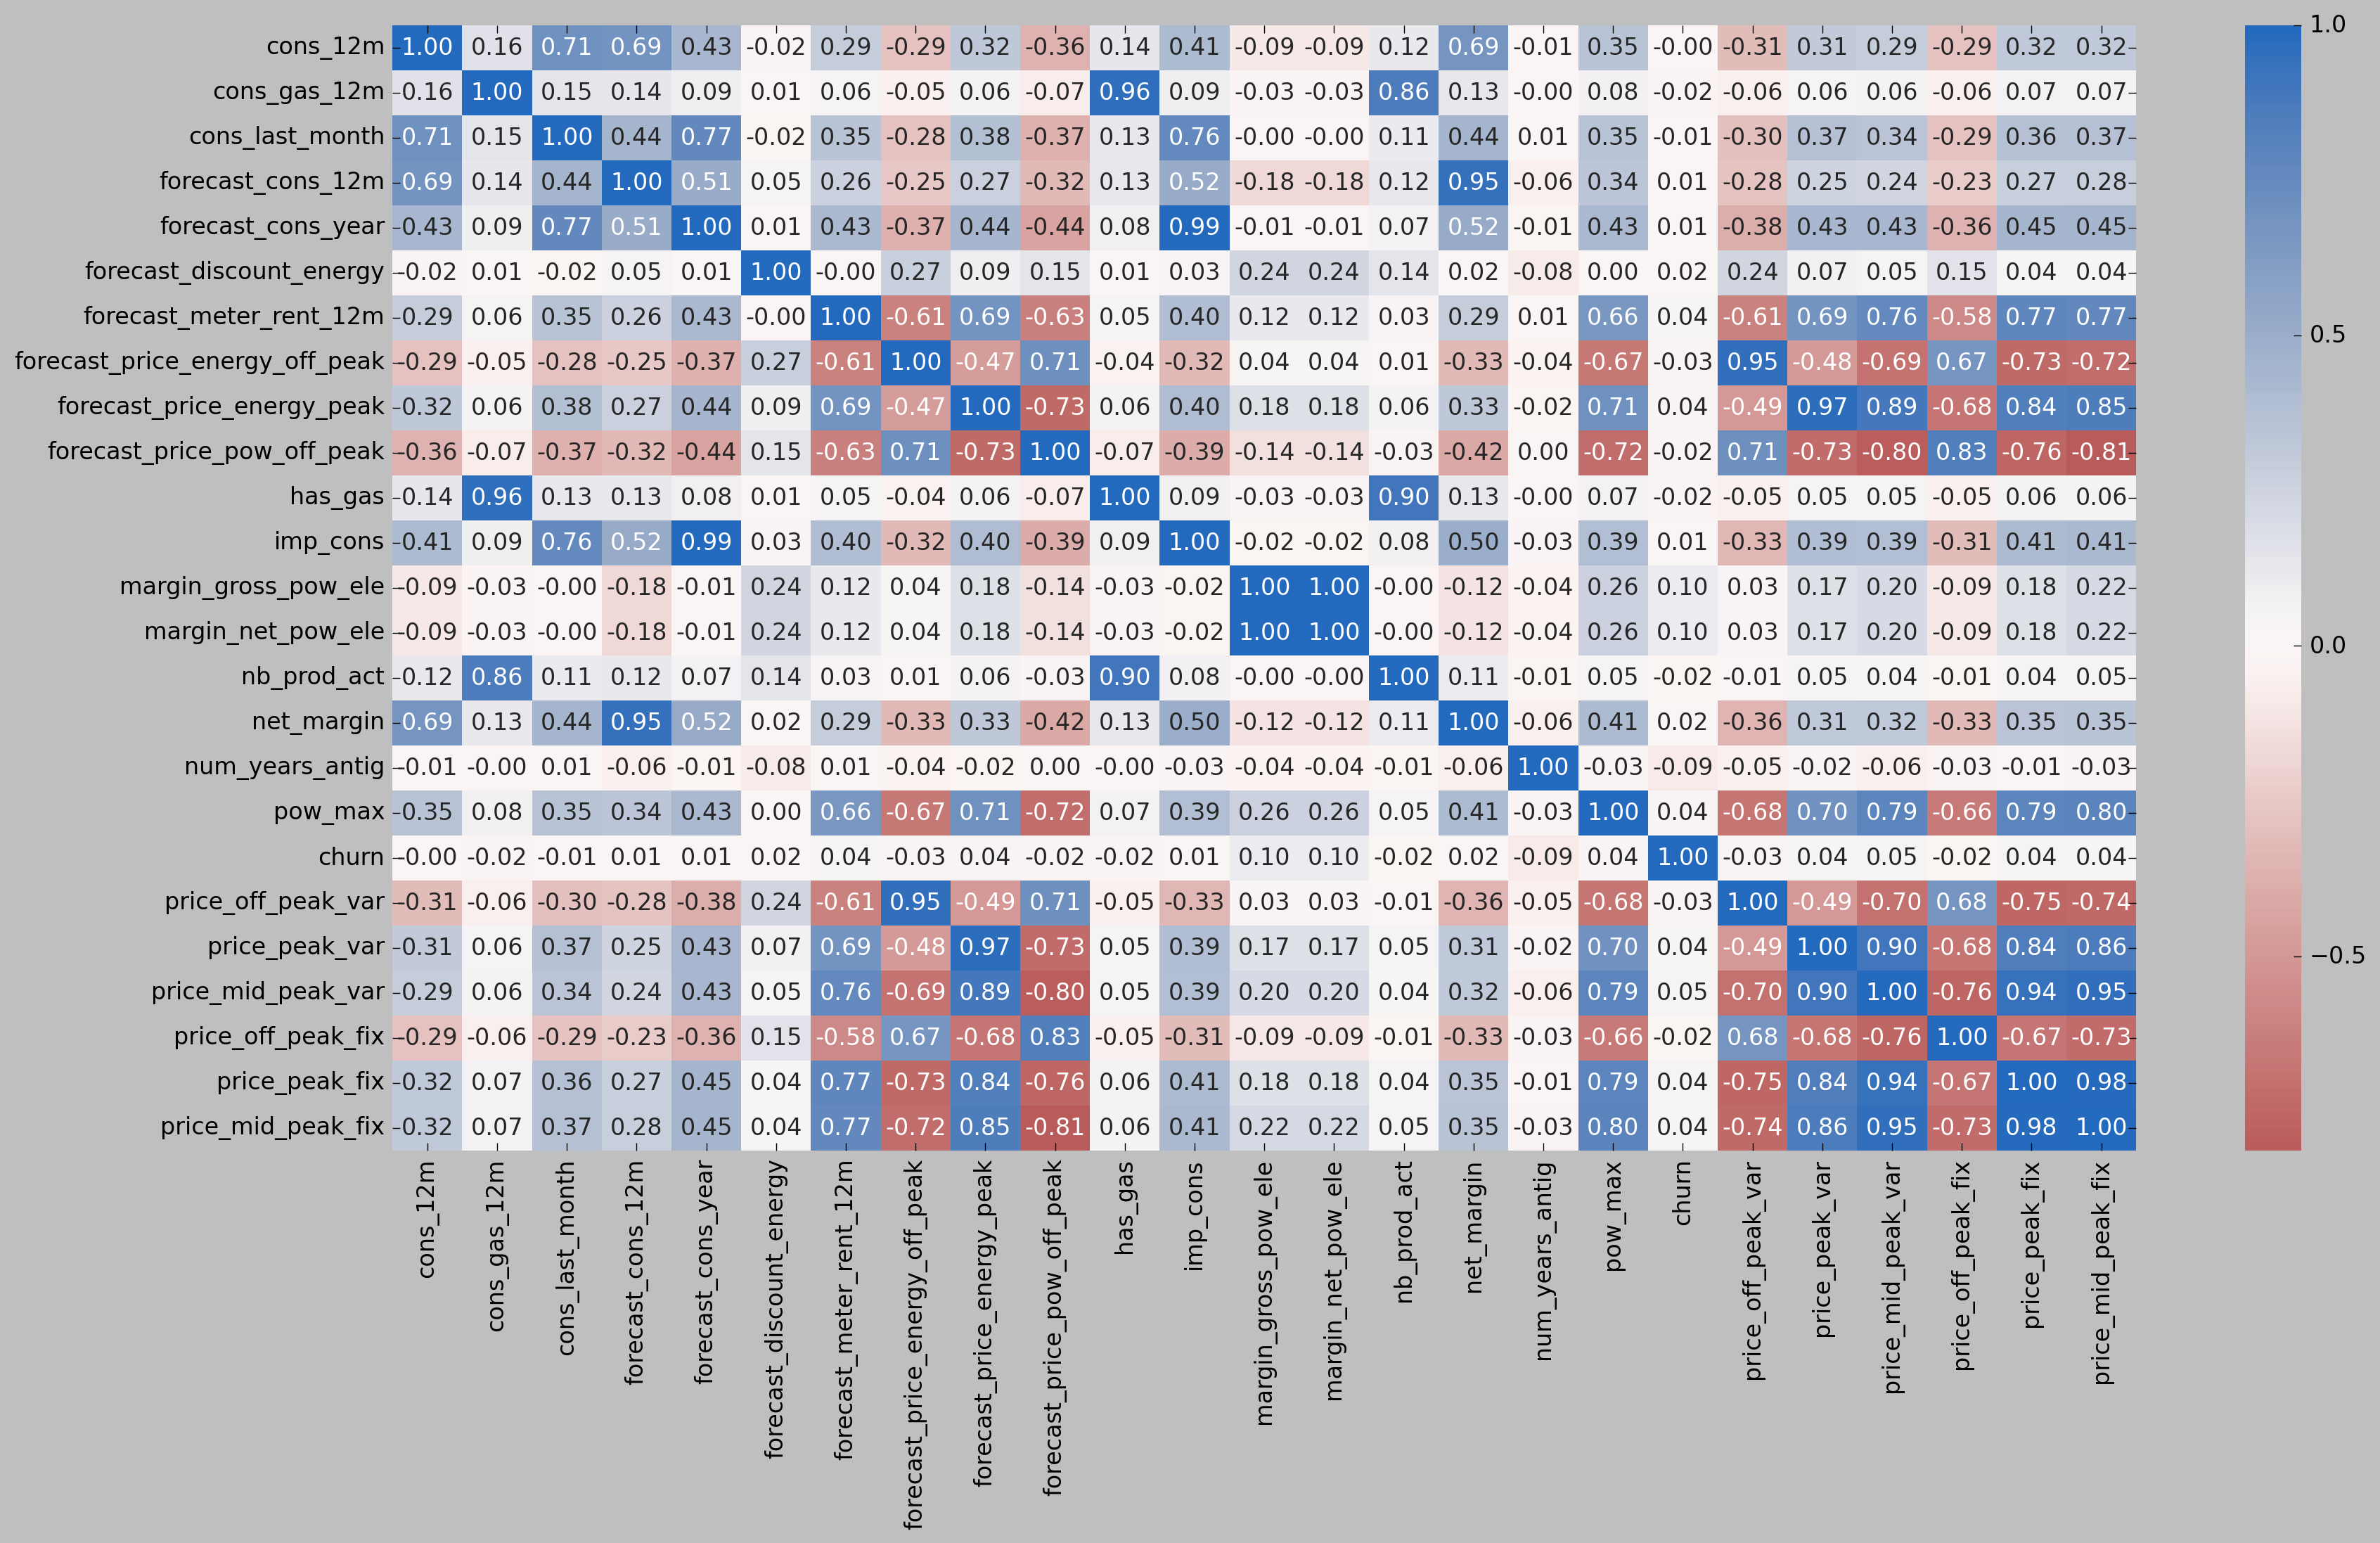

In [51]:
# Select only numeric columns from result_df
numeric_df = result_df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric columns only
corr_df = numeric_df.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(20, 10), dpi=200)
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='vlag_r', center=0)
plt.show()

In [53]:
#**The above correlation matrix shows Spearman rank correlation matrix.
#> The Spearman rank correlation coefficient (also known as Spearman's rho)
#is a measure of the ordinal correlation between two variables, it is based 
#on the rank order of the data rather than the actual values. It ranges from
#-1 to 1, with 0 indicating no correlation, 1 indicating a perfect positive 
#correlation, and -1 indicating a perfect negative correlation. 
#Spearman's rho does not assume that the relationship between the two variables
#is linear or that they are normally distributed. It is particularly useful 
#when dealing with skewed data or outliers.

In [54]:
hypothesis_df = pd.merge(price_df.groupby('id').mean(), client_df[['id','churn']], on="id")

In [57]:
columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
           'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for column in columns:
    ttest_result = ttest_ind(hypothesis_df[hypothesis_df['churn']==0][column],
                             hypothesis_df[hypothesis_df['churn']==1][column], 
                             equal_var=False)
    print(column)
    print(ttest_result)
    print("------------------------")

price_off_peak_var
TtestResult(statistic=0.8211123599141759, pvalue=0.41169173776073953, df=1787.9421954551278)
------------------------
price_peak_var
TtestResult(statistic=-3.5426368995008812, pvalue=0.0004066588047157523, df=1729.49546852865)
------------------------
price_mid_peak_var
TtestResult(statistic=-5.492976113937087, pvalue=4.544122703842065e-08, df=1717.587331911206)
------------------------
price_off_peak_fix
TtestResult(statistic=-2.773806423387593, pvalue=0.005588180822944836, df=2155.9871854468606)
------------------------
price_peak_fix
TtestResult(statistic=-5.5630042315334345, pvalue=3.070692292051358e-08, df=1715.877945724814)
------------------------
price_mid_peak_fix
TtestResult(statistic=-5.313028093578065, pvalue=1.2187439227124392e-07, df=1720.7243538215323)
------------------------


In [58]:
def hypothesis_test(df, columns):
    # Split the data into two separate groups
    churn = df[df['churn'] == 1]
    ret = df[df['churn'] == 0]
    fig, ax = plt.subplots(3, 2, figsize=(13,11), dpi=200)
    i = 0
    for index, column in enumerate(columns):
        # Calculate the means and standard deviations of each group
        churn_mean = churn[column].mean()
        churn_std = churn[column].std()
        ret_mean = ret[column].mean()
        ret_std = ret[column].std()

        # Define a function to generate bootstrap samples
        def bootstrap(data):
            return np.random.choice(data, size=len(data), replace=True)

        # Generate 10,000 bootstrap samples of the data
        churn_bootstrap_means = [bootstrap(churn[column]).mean() for i in range(10000)]
        ret_bootstrap_means = [bootstrap(ret[column]).mean() for i in range(10000)]

        # Calculate the difference between the means of the two groups
        mean_diff = churn_mean - ret_mean

        # Calculate the p-value by comparing the observed difference to the distribution of differences from the bootstrap samples
        null_diff = np.array(churn_bootstrap_means) - np.array(ret_bootstrap_means)
        p_value = (null_diff <= 0).mean()

        # Print the results
        print(column)
        print(f"Bootstrap p-value: {p_value}")

        CI = np.percentile(null_diff, [2.5,97.5])
        print(f"CI: {CI}")
        print("------------------------")
        if index == 3:
            i += 1
        ax[index%3, i].hist(null_diff, bins=40, alpha=1)
        ax[index%3, i].axvline(np.percentile(null_diff,2.5),color = 'red',linewidth=2, label='Confidence Interval')
        ax[index%3, i].axvline(np.percentile(null_diff,97.5),color = 'red',linewidth=2)
        ax[index%3, i].axvline(mean_diff,color = 'black',linewidth=2, label='Mean Difference')
        ax[index%3, i].axvline(0,color = 'green',linewidth=2, label = 'Zero')
        ax[index%3, i].set_title(column)
        ax[index%3, i].set_ylabel("Frequency")
    handles, labels = ax[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=5)
    plt.show()

price_off_peak_var
Bootstrap p-value: 0.8053
CI: [-0.00164762  0.00066648]
------------------------
price_peak_var
Bootstrap p-value: 0.0003
CI: [0.0022131  0.00771394]
------------------------
price_mid_peak_var
Bootstrap p-value: 0.0
CI: [0.00362764 0.00757585]
------------------------
price_off_peak_fix
Bootstrap p-value: 0.0021
CI: [0.08129513 0.44156795]
------------------------
price_peak_fix
Bootstrap p-value: 0.0
CI: [1.24758024 2.59391196]
------------------------
price_mid_peak_fix
Bootstrap p-value: 0.0
CI: [0.74540746 1.60852036]
------------------------


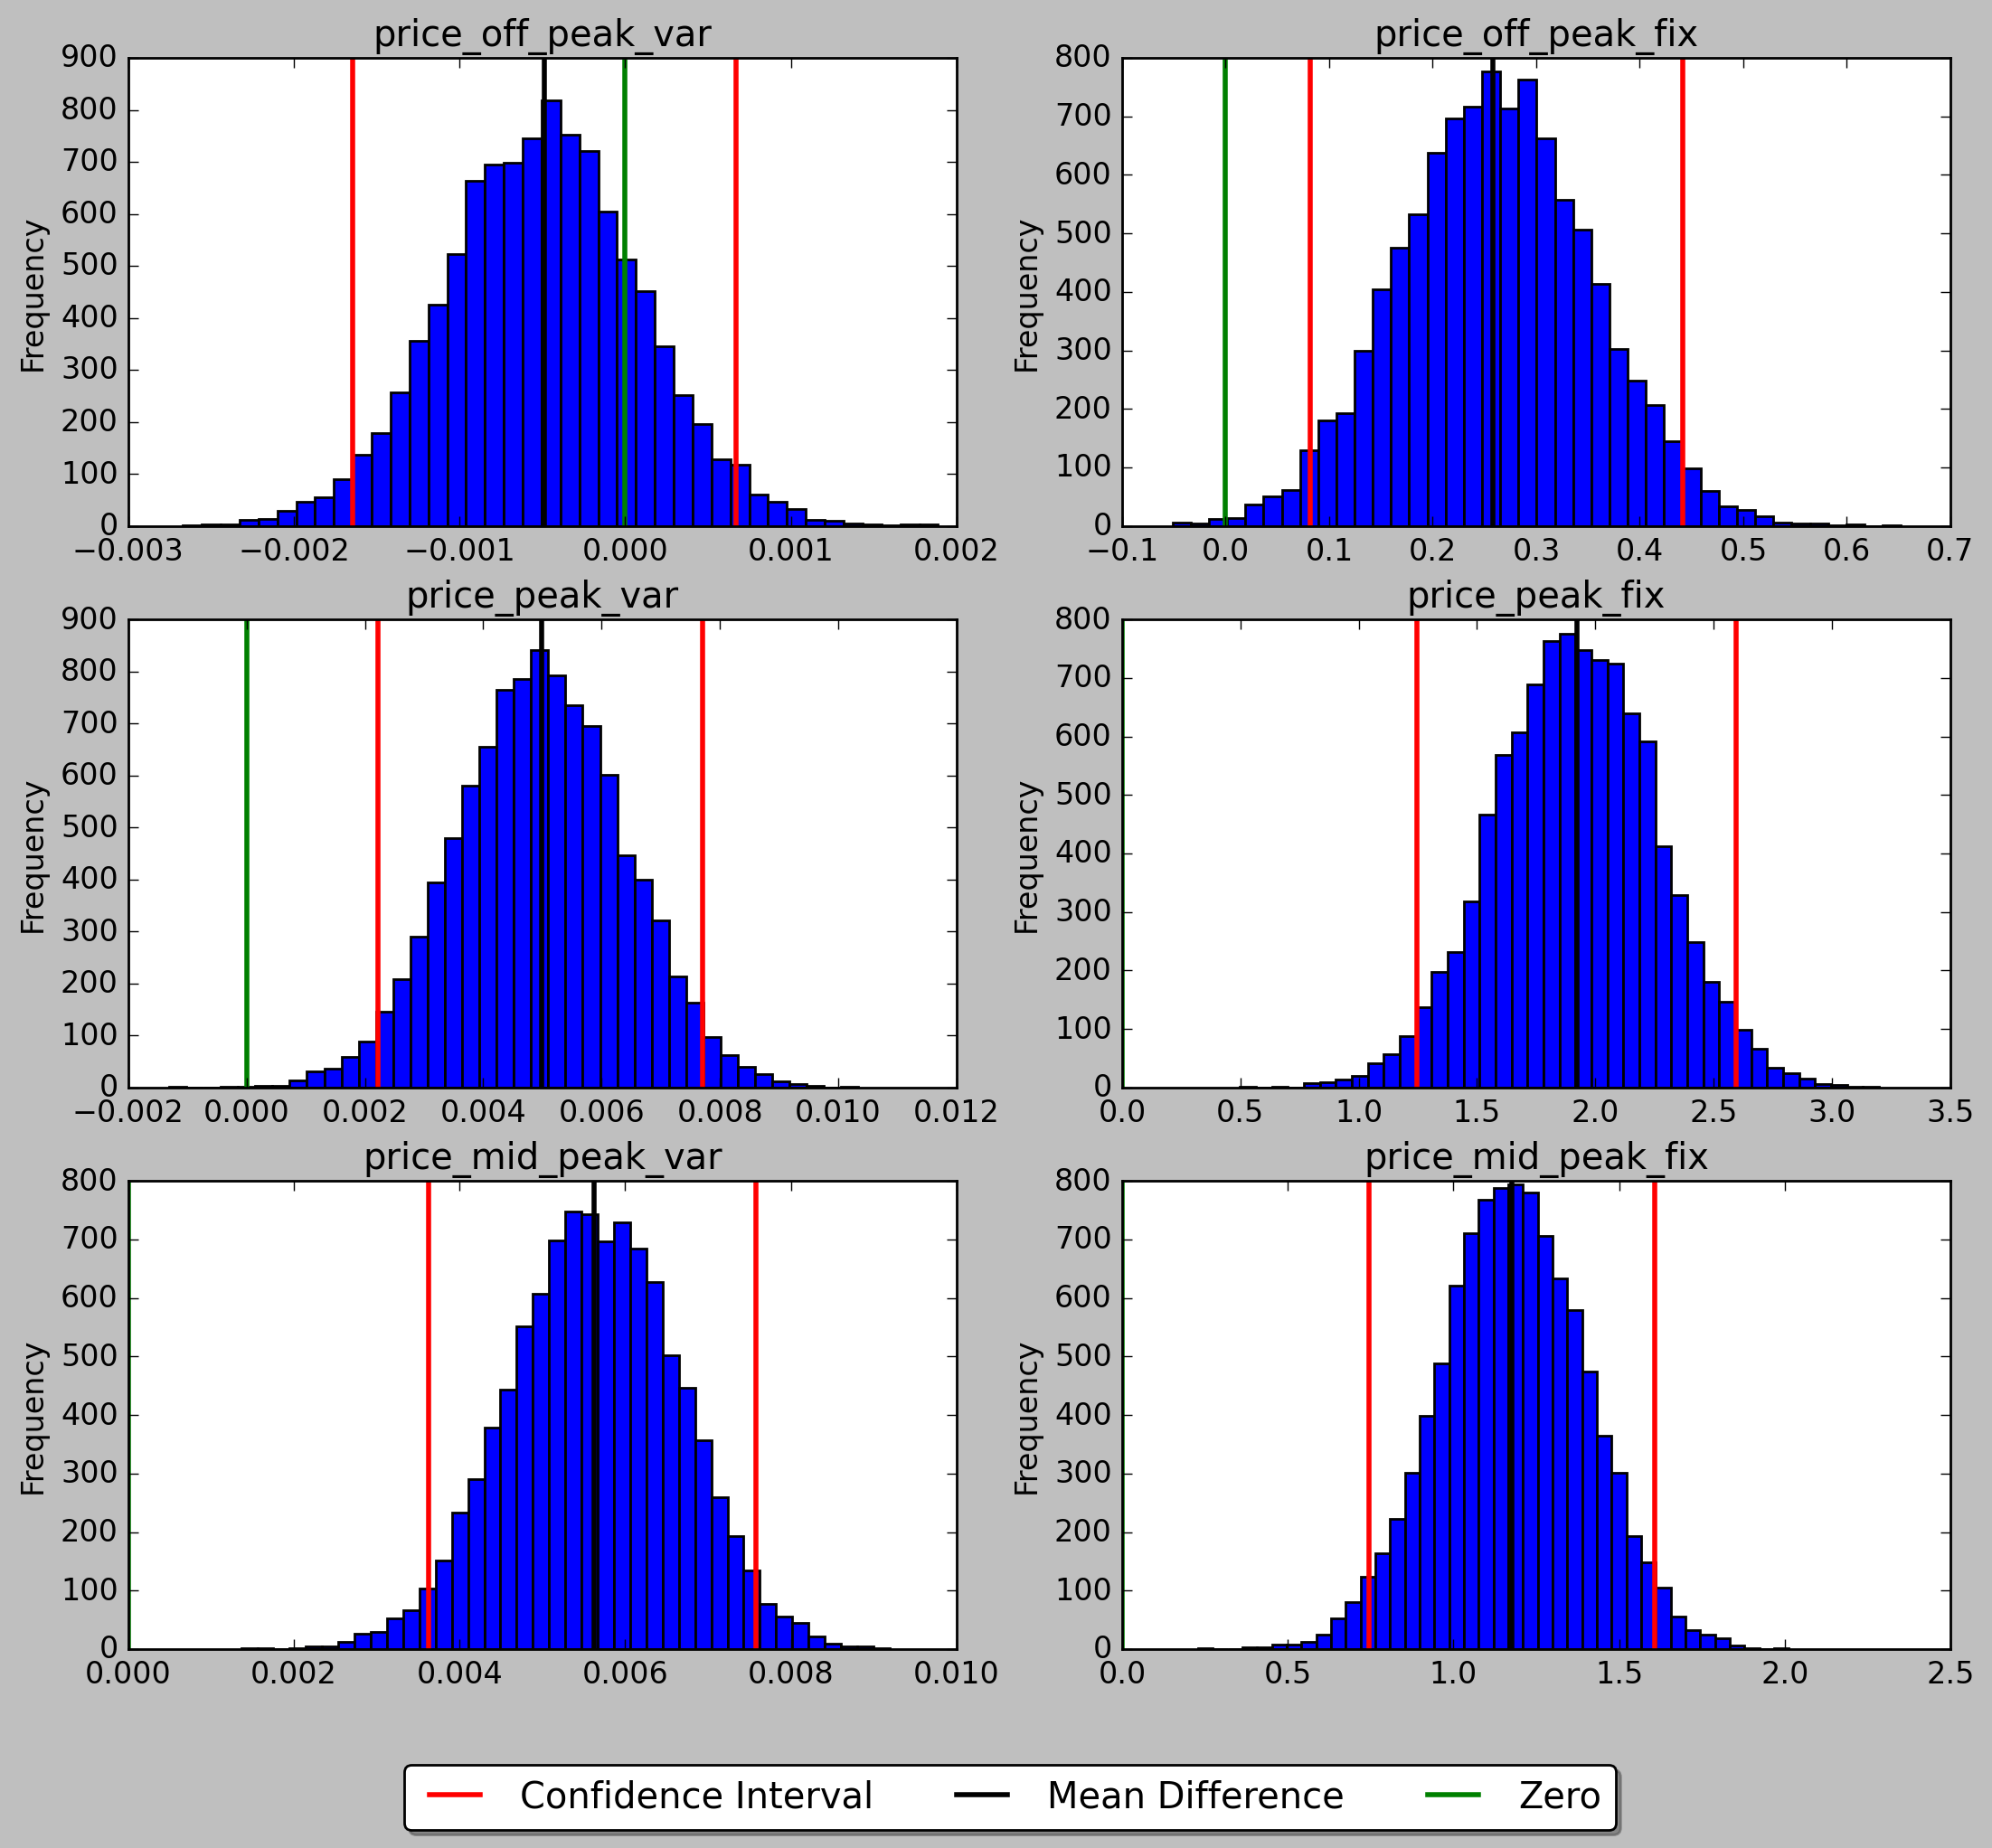

In [59]:
hypothesis_test(hypothesis_df, columns)